In [2]:
import pandas as pd
import numpy as np
import subprocess
import seaborn as sns
import glob
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [3]:
%%bash
source ~/.bashrc
conda activate angsd
cd /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/
realSFS cat wild_NC_*.saf.idx -p 8 \
    -outnames wild
realSFS cat hatchery_NC_*.saf.idx -p 8 \
    -outnames hatchery

	-> This will cat together .saf files from angsd
	-> regions has to be disjoint between saf files. This WONT be checked (alot) !
	-> This has only been tested on safs for different chrs !
	 Examples:
		 'realSFS cat chr1.saf.idx chr2.saf.idx -outnames merged -P 10'
		 'realSFS cat -b file.list -outnames merged -P 10'
		 Possible options: -b file.list -P nThreads 
	-> outnames: 'wild' number of safs:42 nThreads: 8
	-> Number of threads: 8
	-> Setting threads to: 8 for both .saf.gz and saf.pos.gz
	-> Merging 0/42 
	-> Merging 1/42 
	-> Merging 2/42 
	-> Merging 3/42 
	-> Merging 4/42 
	-> Merging 5/42 
	-> Merging 6/42 
	-> Merging 7/42 
	-> Merging 8/42 
	-> Merging 9/42 
	-> Merging 10/42 
	-> Merging 11/42 
	-> Merging 12/42 
	-> Merging 13/42 
	-> Merging 14/42 
	-> Merging 15/42 
	-> Merging 16/42 
	-> Merging 17/42 
	-> Merging 18/42 
	-> Merging 19/42 
	-> Merging 20/42 
	-> Merging 21/42 
	-> Merging 22/42 
	-> Merging 23/42 
	-> Merging 24/42 
	-> Merging 25/42 
	-> Merging 26/4

In [3]:
bed = pd.read_csv("../references/sfon.bed", sep = "\t", header = None)

In [4]:
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "realsfs_print"
    mem = "100"
    cpus = "8"
    saf1 = "wild.saf.idx"
    saf2 = "hatchery.saf.idx"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst"
    outdir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst"
    regions = i + ":"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         saf1 + " " + saf2 + " " + indir + " " + outdir + " " + regions], shell=True)

Submitted batch job 34725791
Submitted batch job 34725792
Submitted batch job 34725793
Submitted batch job 34725794
Submitted batch job 34725795
Submitted batch job 34725797
Submitted batch job 34725798
Submitted batch job 34725799
Submitted batch job 34725800
Submitted batch job 34725801
Submitted batch job 34725802
Submitted batch job 34725803
Submitted batch job 34725804
Submitted batch job 34725805
Submitted batch job 34725806
Submitted batch job 34725807
Submitted batch job 34725808
Submitted batch job 34725809
Submitted batch job 34725810
Submitted batch job 34725811
Submitted batch job 34725812
Submitted batch job 34725813
Submitted batch job 34725814
Submitted batch job 34725815
Submitted batch job 34725816
Submitted batch job 34725817
Submitted batch job 34725818
Submitted batch job 34725819
Submitted batch job 34725820
Submitted batch job 34725821
Submitted batch job 34725822
Submitted batch job 34725823
Submitted batch job 34725824
Submitted batch job 34725825
Submitted batc

In [6]:
%%bash
source ~/.bashrc
conda activate angsd
cd /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/
for i in $( ls intersect_NC_*:.txt ); do
    angsd sites index ${i}
done

	-> Indexing intersect_NC_074665.1:.txt and will add '0' to pos column
	-> Filterfile: intersect_NC_074665.1:.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074665.1' 
	-> Filtering complete: Observed: 1 different chromosomes from file:intersect_NC_074665.1:.txt
	-> Generated files:	
		'intersect_NC_074665.1:.txt.bin'
		'intersect_NC_074665.1:.txt.idx'
	-> Indexing intersect_NC_074666.1:.txt and will add '0' to pos column
	-> Filterfile: intersect_NC_074666.1:.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074666.1' 
	-> Filtering complete: Observed: 1 different chromosomes from file:intersect_NC_074666.1:.txt
	-> Generated files:	
		'intersect_NC_074666.1:.txt.bin'
		'intersect_NC_074666.1:.txt.idx'
	-> Indexing intersect_NC_074667.1:.txt and will add '0' to pos column
	-> Filterfile: intersect_NC_074667.1:.txt supplied will generate binary representations.

	-> Filtering complete: Observed: 1 different chromosomes from file:intersect_NC_074684.1:.txt
	-> Generated files:	
		'intersect_NC_074684.1:.txt.bin'
		'intersect_NC_074684.1:.txt.idx'
	-> Indexing intersect_NC_074685.1:.txt and will add '0' to pos column
	-> Filterfile: intersect_NC_074685.1:.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074685.1' 
	-> Filtering complete: Observed: 1 different chromosomes from file:intersect_NC_074685.1:.txt
	-> Generated files:	
		'intersect_NC_074685.1:.txt.bin'
		'intersect_NC_074685.1:.txt.idx'
	-> Indexing intersect_NC_074686.1:.txt and will add '0' to pos column
	-> Filterfile: intersect_NC_074686.1:.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074686.1' 
	-> Filtering complete: Observed: 1 different chromosomes from file:intersect_NC_074686.1:.txt
	-> Generated files:	
		'intersect_NC_074686.1:.txt.bin'
		'inter

	-> Filterfile: intersect_NC_074704.1:.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074704.1' 
	-> Filtering complete: Observed: 1 different chromosomes from file:intersect_NC_074704.1:.txt
	-> Generated files:	
		'intersect_NC_074704.1:.txt.bin'
		'intersect_NC_074704.1:.txt.idx'
	-> Indexing intersect_NC_074705.1:.txt and will add '0' to pos column
	-> Filterfile: intersect_NC_074705.1:.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074705.1' 
	-> Filtering complete: Observed: 1 different chromosomes from file:intersect_NC_074705.1:.txt
	-> Generated files:	
		'intersect_NC_074705.1:.txt.bin'
		'intersect_NC_074705.1:.txt.idx'
	-> Indexing intersect_NC_074706.1:.txt and will add '0' to pos column
	-> Filterfile: intersect_NC_074706.1:.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074706.1'

In [11]:
!mkdir -p /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_dxy

In [10]:
bed = pd.read_csv("../references/sfon.bed", sep = "\t", header = None)

In [12]:
strain = "hatchery"
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "sfs_input_fst"
    mem = "100"
    cpus = "8"
    bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_dxy"
    outprefix = strain.replace(" ", "_") + "_" + i
    regions = i + ":"
    sitesfile = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/intersect_" + i + ":.txt"
    ref = "../references/sfon_with_mito.fa"
    minind = "24"
    maxdepth = "189"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bamlist + " " + outpath + " " + outprefix + " " + 
         sitesfile + " " + regions + " " + ref + " " + minind + " " + maxdepth], shell=True)

Submitted batch job 34758902
Submitted batch job 34758903
Submitted batch job 34758904
Submitted batch job 34758905
Submitted batch job 34758906
Submitted batch job 34758907
Submitted batch job 34758908
Submitted batch job 34758909
Submitted batch job 34758910
Submitted batch job 34758912
Submitted batch job 34758913
Submitted batch job 34758914
Submitted batch job 34758915
Submitted batch job 34758916
Submitted batch job 34758917
Submitted batch job 34758918
Submitted batch job 34758919
Submitted batch job 34758920
Submitted batch job 34758921
Submitted batch job 34758922
Submitted batch job 34758923
Submitted batch job 34758924
Submitted batch job 34758925
Submitted batch job 34758926
Submitted batch job 34758927
Submitted batch job 34758928
Submitted batch job 34758929
Submitted batch job 34758930
Submitted batch job 34758931
Submitted batch job 34758932
Submitted batch job 34758933
Submitted batch job 34758934
Submitted batch job 34758935
Submitted batch job 34758936
Submitted batc

In [16]:
strain = "wild"
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "sfs_input_fst"
    mem = "100"
    cpus = "8"
    bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_dxy"
    outprefix = strain.replace(" ", "_") + "_" + i
    regions = i + ":"
    sitesfile = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/intersect_" + i + ":.txt"
    ref = "../references/sfon_with_mito.fa"
    minind = "32"
    maxdepth = "247"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bamlist + " " + outpath + " " + outprefix + " " + 
         sitesfile + " " + regions + " " + ref + " " + minind + " " + maxdepth], shell=True)

Submitted batch job 34759056
Submitted batch job 34759057
Submitted batch job 34759058
Submitted batch job 34759059
Submitted batch job 34759060
Submitted batch job 34759061
Submitted batch job 34759062
Submitted batch job 34759063
Submitted batch job 34759064
Submitted batch job 34759065
Submitted batch job 34759066
Submitted batch job 34759067
Submitted batch job 34759068
Submitted batch job 34759069
Submitted batch job 34759070
Submitted batch job 34759071
Submitted batch job 34759072
Submitted batch job 34759073
Submitted batch job 34759074
Submitted batch job 34759075
Submitted batch job 34759076
Submitted batch job 34759078
Submitted batch job 34759079
Submitted batch job 34759080
Submitted batch job 34759081
Submitted batch job 34759082
Submitted batch job 34759083
Submitted batch job 34759084
Submitted batch job 34759085
Submitted batch job 34759086
Submitted batch job 34759087
Submitted batch job 34759088
Submitted batch job 34759089
Submitted batch job 34759090
Submitted batc

In [ ]:
!wc -l 

In [20]:
!wc -l /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/intersect_NC_074665.1:.txt

39117233 /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/intersect_NC_074665.1:.txt


In [17]:
i

'NC_074665.1'

In [13]:
for i in bed[0][bed[0].str.contains("NC")].tolist()[0:1]:
    task = "dxy"
    mem = "100"
    cpus = "8"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_dxy"
    saf1_prefix = "wild_" + i
    saf2_prefix = "hatchery_" + i
    intersect = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/intersect_" + i + ":.txt"
    nind_saf1 = "126"
    nind_saf2 = "93"
    outdir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_dxy/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + saf1_prefix + " " + saf2_prefix + " " + intersect + " " + 
                    nind_saf1 + " " + nind_saf2 + " " + outdir ], shell=True)

Submitted batch job 34894862


In [23]:
!wc -l ../wild.bamlist

126 ../wild.bamlist


In [16]:
!cat ./slurm-34894862.out

	->Dumping file: /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_dxy//wild_NC_074665.1_hatchery_NC_074665.1.stats.txt

Len 39117233 and win 20000 and rest is 17233
Num of win 1956 and win[0] is 0 19999
Block 0 out of 1955 from 0 to 19999

	-> Possible error reading SFS, binary file might be broken...


In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=realsfsprint

source ~/.bashrc
conda activate angsd

SAF1=$1
SAF2=$2
INDIR=$3
OUTDIR=$4
REGIONS=$5

cd $SLURM_SUBMIT_DIR
mkdir -p ${OUTDIR}

cd ${INDIR}
realSFS print -P ${SLURM_NTASKS} \
    ${SAF1} ${SAF2} -r ${REGIONS} \
    | cut -f 1-2 \
    > ${OUTDIR}/intersect_${REGIONS}.txt


In [27]:
!cat ../fst_calc_2pop.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_2dsfs

source ~/.bashrc
conda activate angsd

INDIR=$1
PREFIX1=$2
PREFIX2=$3
SFS=$4

cd $SLURM_SUBMIT_DIR
cd ${INDIR}

realSFS fst index -fold 1 -cores ${SLURM_NTASKS} \
    ${PREFIX1}.saf.idx \
    ${PREFIX2}.saf.idx \
    -sfs ${SFS} \
    -whichFst 1 \
    -fstout ${PREFIX1}.${PREFIX2}

realSFS fst stats ${PREFIX1}.${PREFIX2}.fst.idx \
    > ${PREFIX1}.${PREFIX2}.fst.global

realSFS fst stats2 \
    ${PREFIX1}.${PREFIX2}.fst.idx \
    -win 5000 -step 500 > ${PREFIX1}.${PREFIX2}.fst.window


In [97]:
!cat ../sfs_calc_1pop.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_1dsfs

source ~/.bashrc
conda activate angsd

INDIR=$1
PREFIX1=$2
OUTDIR=$3

cd $SLURM_SUBMIT_DIR
cd ${INDIR}

mkdir -p ${OUTDIR}

winsfs -v --threads ${SLURM_NTASKS} \
    ${PREFIX1}.saf.idx \
    > ${OUTDIR}/${PREFIX1}.ml

winsfs view --fold \
    ${OUTDIR}/${PREFIX1}.ml \
    | grep -v "^#" \
    > ${OUTDIR}/${PREFIX1}.folded.ml


In [61]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "sfs_calc_1pop"
    mem = "128"
    cpus = "6"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/"
    strain1 = "wild_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + outdir], shell=True)

Submitted batch job 34911787
Submitted batch job 34911788
Submitted batch job 34911789
Submitted batch job 34911790
Submitted batch job 34911791
Submitted batch job 34911792
Submitted batch job 34911793
Submitted batch job 34911794
Submitted batch job 34911795
Submitted batch job 34911796
Submitted batch job 34911797
Submitted batch job 34911798
Submitted batch job 34911799
Submitted batch job 34911800
Submitted batch job 34911801
Submitted batch job 34911802
Submitted batch job 34911803
Submitted batch job 34911804
Submitted batch job 34911805
Submitted batch job 34911806
Submitted batch job 34911807
Submitted batch job 34911808
Submitted batch job 34911809
Submitted batch job 34911810
Submitted batch job 34911811
Submitted batch job 34911812
Submitted batch job 34911813
Submitted batch job 34911814
Submitted batch job 34911815
Submitted batch job 34911816
Submitted batch job 34911817
Submitted batch job 34911818
Submitted batch job 34911820
Submitted batch job 34911822
Submitted batc

In [62]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "sfs_calc_1pop"
    mem = "128"
    cpus = "6"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/"
    strain1 = "hatchery_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + outdir], shell=True)

Submitted batch job 34911834
Submitted batch job 34911835
Submitted batch job 34911836
Submitted batch job 34911837
Submitted batch job 34911838
Submitted batch job 34911839
Submitted batch job 34911840
Submitted batch job 34911841
Submitted batch job 34911842
Submitted batch job 34911843
Submitted batch job 34911844
Submitted batch job 34911845
Submitted batch job 34911846
Submitted batch job 34911847
Submitted batch job 34911848
Submitted batch job 34911849
Submitted batch job 34911850
Submitted batch job 34911851
Submitted batch job 34911852
Submitted batch job 34911853
Submitted batch job 34911854
Submitted batch job 34911855
Submitted batch job 34911856
Submitted batch job 34911857
Submitted batch job 34911858
Submitted batch job 34911859
Submitted batch job 34911860
Submitted batch job 34911861
Submitted batch job 34911862
Submitted batch job 34911864
Submitted batch job 34911865
Submitted batch job 34911866
Submitted batch job 34911867
Submitted batch job 34911868
Submitted batc

In [63]:
sfs_joined = pd.DataFrame()
for sfs in glob.glob("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/wild_*.folded.ml"):
    tmp = pd.read_csv(sfs, 
            sep = " ", header = None)
    sfs_joined = pd.concat([sfs_joined, tmp]).reset_index(drop=True)
sfs_joined = pd.DataFrame([sfs_joined.sum()])
sfs_joined.to_csv("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/wild.folded.ml", 
                  sep = " ", header = None, index = False)

In [64]:
sfs_joined = pd.DataFrame()
for sfs in glob.glob("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/hatchery_*.folded.ml"):
    tmp = pd.read_csv(sfs, 
            sep = " ", header = None)
    sfs_joined = pd.concat([sfs_joined, tmp]).reset_index(drop=True)
sfs_joined = pd.DataFrame([sfs_joined.sum()])
sfs_joined.to_csv("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/hatchery.folded.ml", 
                  sep = " ", header = None, index = False)

In [229]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "tajima"
    mem = "128"
    cpus = "8"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/"
    prefix1 = "wild_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/"
    sfs = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/wild.folded.ml"
    windowsize = "50000"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + prefix1 + " " + outdir + " " + sfs + " " + windowsize], shell=True)

Submitted batch job 35279440
Submitted batch job 35279441
Submitted batch job 35279442
Submitted batch job 35279443
Submitted batch job 35279444
Submitted batch job 35279445
Submitted batch job 35279446
Submitted batch job 35279447
Submitted batch job 35279448
Submitted batch job 35279449
Submitted batch job 35279450
Submitted batch job 35279451
Submitted batch job 35279452
Submitted batch job 35279453
Submitted batch job 35279454
Submitted batch job 35279455
Submitted batch job 35279456
Submitted batch job 35279457
Submitted batch job 35279458
Submitted batch job 35279459
Submitted batch job 35279460
Submitted batch job 35279461
Submitted batch job 35279462
Submitted batch job 35279463
Submitted batch job 35279464
Submitted batch job 35279465
Submitted batch job 35279466
Submitted batch job 35279467
Submitted batch job 35279468
Submitted batch job 35279469
Submitted batch job 35279470
Submitted batch job 35279471
Submitted batch job 35279472
Submitted batch job 35279473
Submitted batc

In [230]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "tajima"
    mem = "128"
    cpus = "8"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/"
    prefix1 = "hatchery_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/"
    sfs = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/hatchery.folded.ml"
    windowsize = "50000"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + prefix1 + " " + outdir + " " + sfs + " " + windowsize], shell=True)

Submitted batch job 35279484
Submitted batch job 35279485
Submitted batch job 35279486
Submitted batch job 35279487
Submitted batch job 35279488
Submitted batch job 35279489
Submitted batch job 35279490
Submitted batch job 35279491
Submitted batch job 35279492
Submitted batch job 35279493
Submitted batch job 35279494
Submitted batch job 35279495
Submitted batch job 35279496
Submitted batch job 35279497
Submitted batch job 35279498
Submitted batch job 35279499
Submitted batch job 35279500
Submitted batch job 35279501
Submitted batch job 35279502
Submitted batch job 35279503
Submitted batch job 35279504
Submitted batch job 35279505
Submitted batch job 35279506
Submitted batch job 35279507
Submitted batch job 35279508
Submitted batch job 35279509
Submitted batch job 35279510
Submitted batch job 35279511
Submitted batch job 35279512
Submitted batch job 35279513
Submitted batch job 35279514
Submitted batch job 35279515
Submitted batch job 35279516
Submitted batch job 35279518
Submitted batc

In [32]:
!cat /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/wild_NC_*.1.10000.thetas.windows.gz.pestPG \
    | grep -v "Chr" > /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/wild.10000.thetas.windows.gz.pestPG

In [31]:
!cat /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/hatchery_NC_*.1.10000.thetas.windows.gz.pestPG \
    | grep -v "Chr" > /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_tajima/hatchery.10000.thetas.windows.gz.pestPG

In [4]:
tmp = pd.read_csv("../wild.10000.thetas.windows.gz.pestPG", 
                  sep = '\t', header = None)
tmp.columns = ["Window", "Chr", "midPos", "tW", "tP", "tF", "tH", "tL", "Tajima", "fuf", "fud", "fayh", "zeng", "nSites"]
tmp1 = pd.read_csv("../hatchery.10000.thetas.windows.gz.pestPG", 
                   sep = '\t', header = None)
tmp1.columns = ["Window", "Chr", "midPos", "tW", "tP", "tF", "tH", "tL", "Tajima", "fuf", "fud", "fayh", "zeng", "nSites"]
tmp = tmp[["Chr", "midPos", "Tajima", "nSites", "tP"]]
tmp.columns = ["Chr", "midPos", "Tajima_wild", "nSites_wild", "tP_wild"]
tmp1 = tmp1[["Chr", "midPos", "Tajima", "nSites", "tP"]]
tmp1.columns = ["Chr", "misPos", "Tajima_hatchery", "nSites_hatchery", "tP_hatchery"]
tajima = pd.concat([tmp, tmp1[["Tajima_hatchery", "nSites_hatchery", "tP_hatchery"]]], axis = 1)
tajima = tajima[tajima["nSites_wild"] > 500][tajima["nSites_hatchery"] > 500].reset_index(drop=True)
tajima["delta"] = tajima["Tajima_hatchery"] - tajima["Tajima_wild"]

/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/344889966.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tajima = tajima[tajima["nSites_wild"] > 500][tajima["nSites_hatchery"] > 500].reset_index(drop=True)


In [5]:
tajima["pi_hatchery"] = tajima["tP_hatchery"] / tajima["nSites_hatchery"]
tajima["pi_wild"] = tajima["tP_wild"] / tajima["nSites_wild"]

In [6]:
tajima["pi_delta"] = tajima["pi_hatchery"] - tajima["pi_wild"]

In [53]:
!cat /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/wild_*.10000.fst.window | grep -v "chr" \
    > /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/10000.fst.window

In [7]:
tmp = pd.read_csv("../10000.fst.window", 
                  sep = '\t', header = None)
tmp.columns = ["Window", "Chr", "midPos", "nSites", "Fst"]
fst = tmp[tmp["nSites"] > 500].reset_index(drop=True)

In [8]:
q1 = np.percentile(tajima["delta"], 25)
q3 = np.percentile(tajima["delta"], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [9]:
tajima["significant"] = "No"
tajima.loc[tajima["delta"] > upper_bound, "significant"] = "Positive"
tajima.loc[tajima["delta"] < lower_bound, "significant"] = "Negative"

In [10]:
fst = fst.merge(tajima[["Chr", "midPos", "significant"]], on = ["Chr", "midPos"], how = "left").fillna("No")

In [11]:
df = fst[["midPos", "Chr", "Fst", "significant"]].reset_index(drop=True)

#chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
#chrmap["index"] = chrmap["index"] + 1
#chrmap.columns = ["Chromosome", "Accession"]
#chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["Chr"]

#df = df.replace(chrmap)
df["accession"] = tmp
df.Chr = df.Chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['Chr', "midPos"], ascending = True)

df.loc[df["Fst"] < 0, "Fst"] = 0
df = df[df["Fst"].notna()].reset_index(drop=True)
threshold = np.percentile(df.Fst, 99.99)
upper_1_percent = df.Fst[df.Fst >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["Fst"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

In [12]:
indices = df[df["index"] == 1][df["Fst"] > upper_1_percent][df["significant"] != "No"].reset_index(drop=True)

/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/1361459552.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = df[df["index"] == 1][df["Fst"] > upper_1_percent][df["significant"] != "No"].reset_index(drop=True)
/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/1361459552.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = df[df["index"] == 1][df["Fst"] > upper_1_percent][df["significant"] != "No"].reset_index(drop=True)


In [13]:
indices = indices.sort_values("Fst", ascending = False).reset_index(drop=True)

/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/2641939714.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = tajima[tajima["Chr"] == indices["Chr"][i]][tajima["midPos"] > (indices["midPos"][i] - 50000)][tajima["midPos"] < (indices["midPos"][i] + 50000)].reset_index(drop=True),
/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/2641939714.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = tajima[tajima["Chr"] == indices["Chr"][i]][tajima["midPos"] > (indices["midPos"][i] - 50000)][tajima["midPos"] < (indices["midPos"][i] + 50000)].reset_index(drop=True),
/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/2641939714.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = tajima[tajima["Chr"] == indices["Chr"][i]][tajima["midPos"] > (indices["midPos"][i] - 50000)][tajima["midPos"] < (indices["midPos"][i] + 500

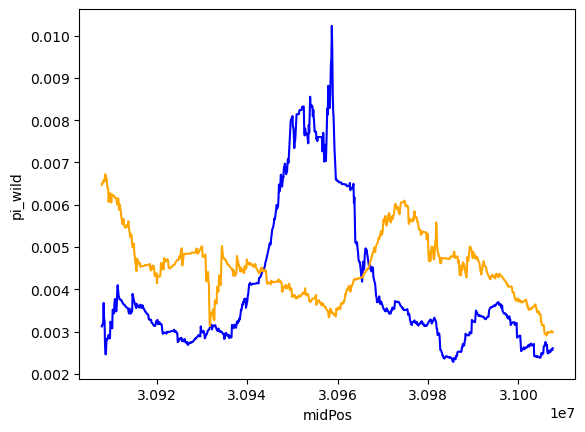

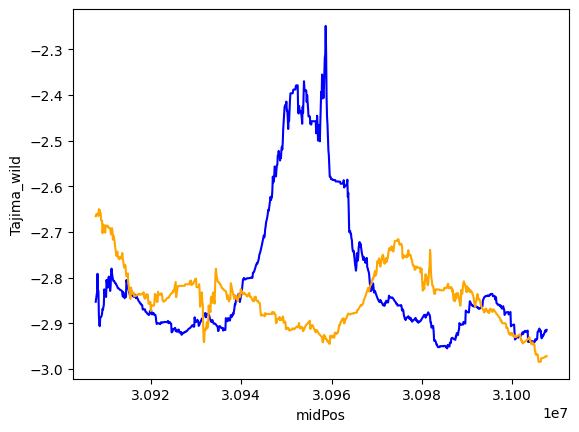

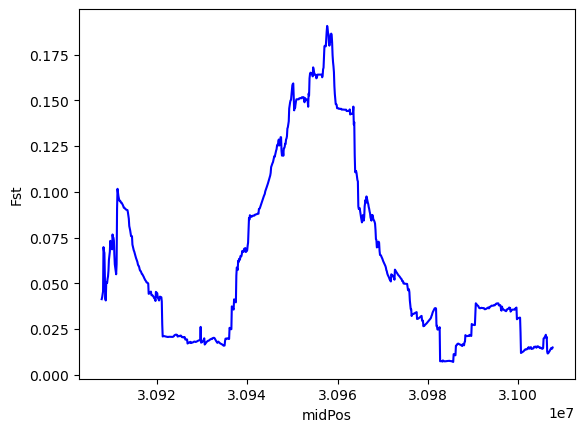

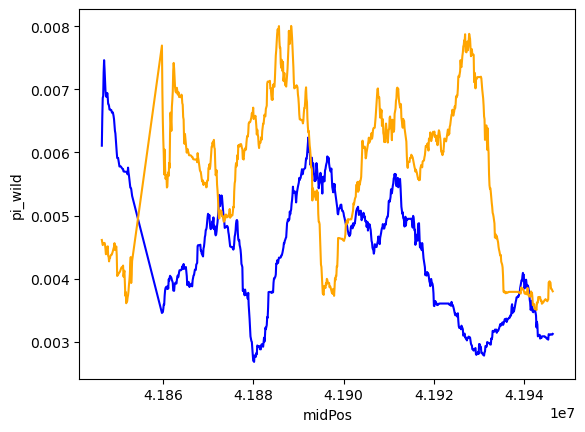

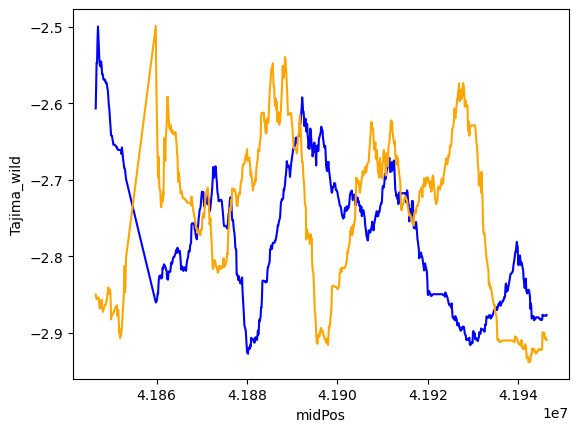

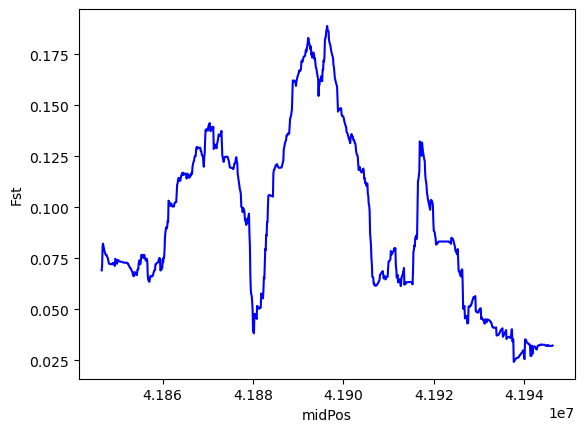

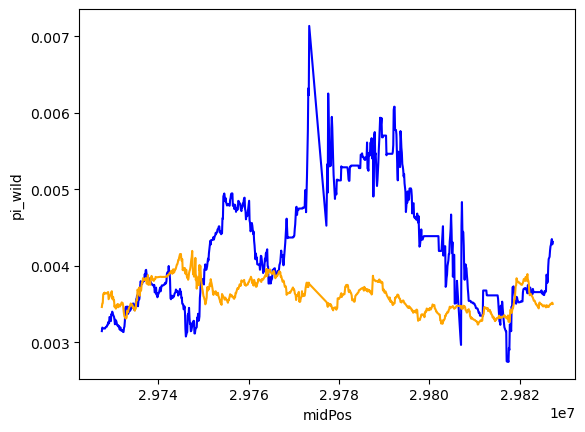

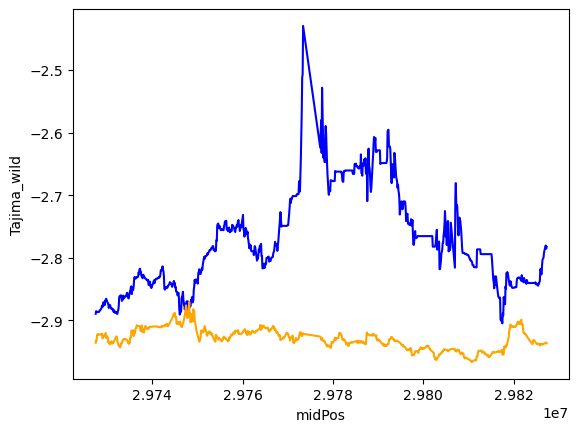

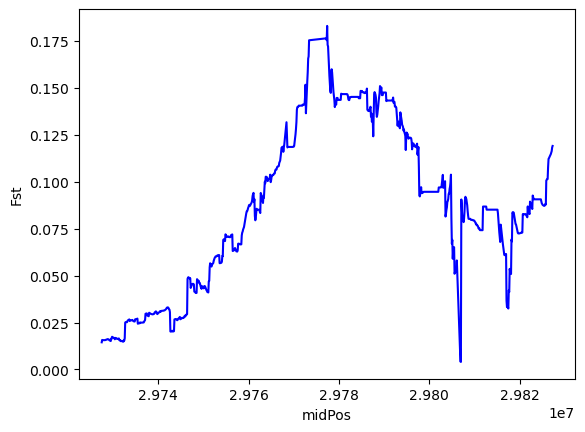

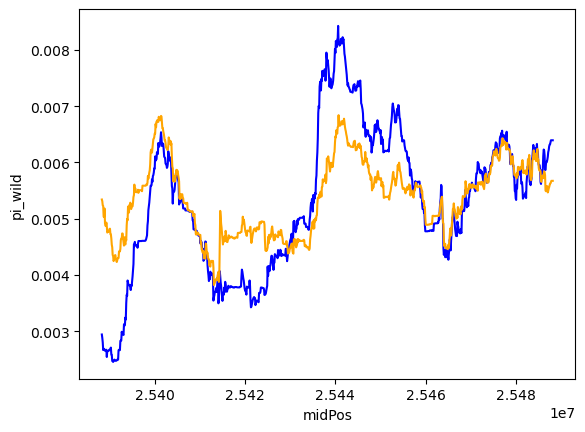

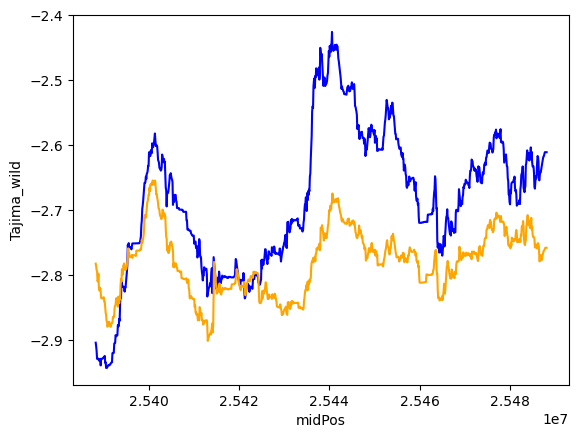

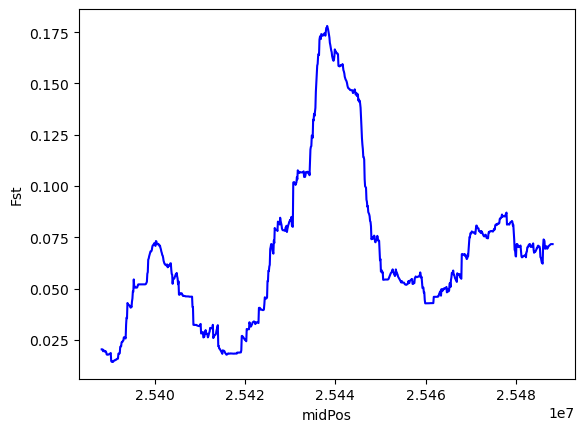

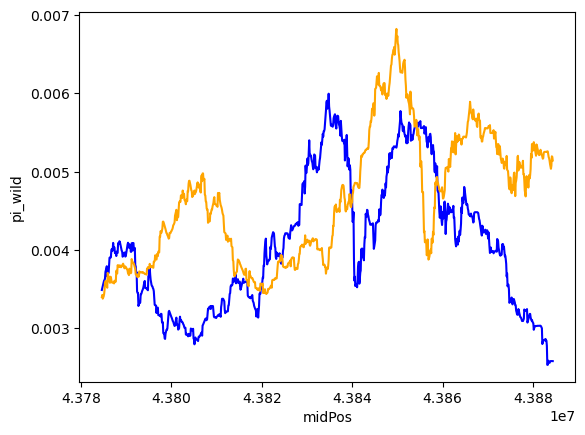

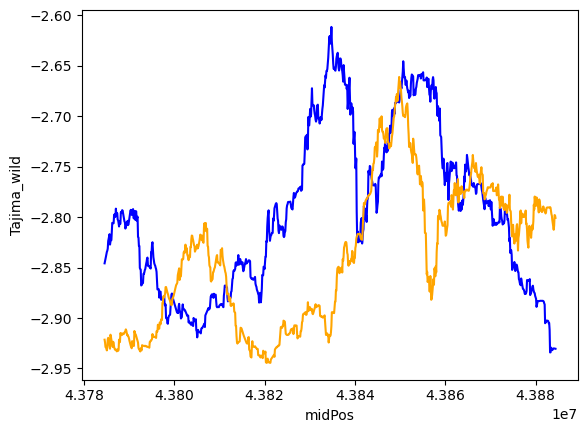

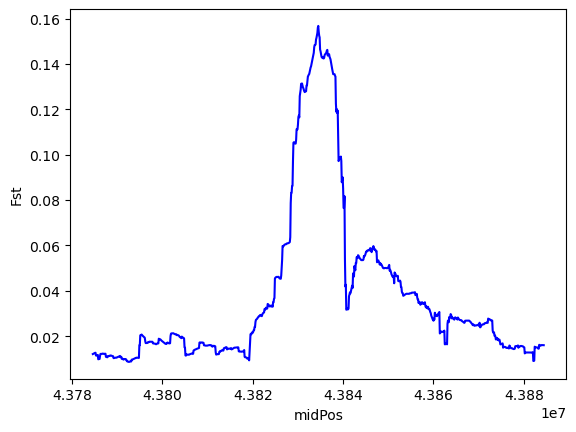

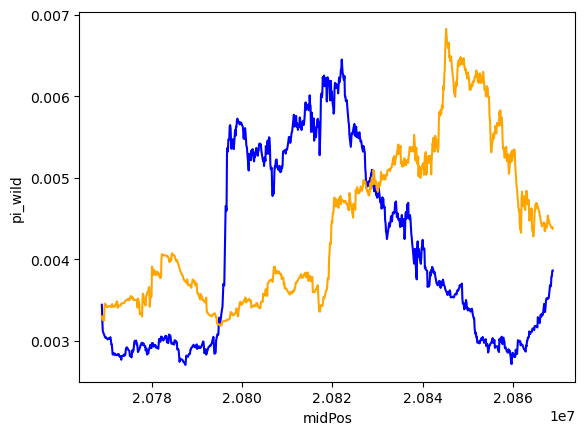

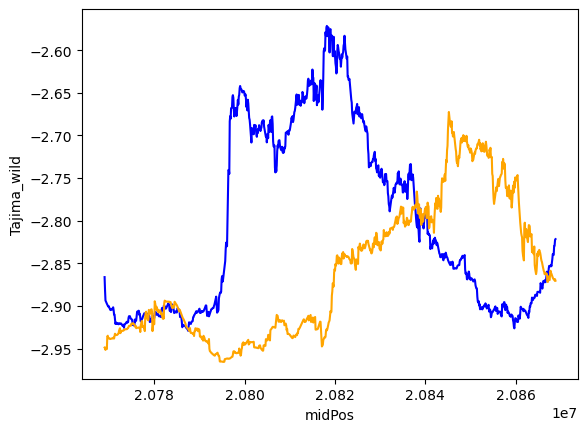

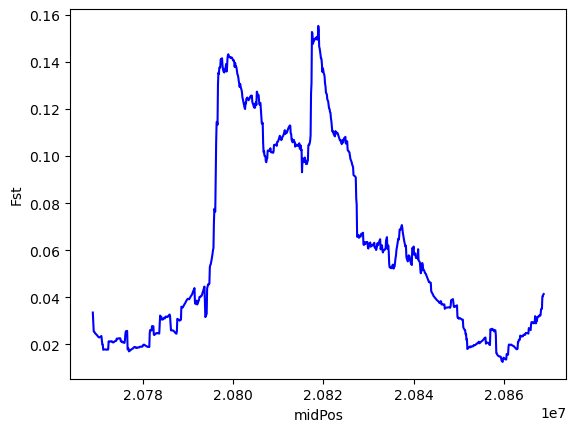

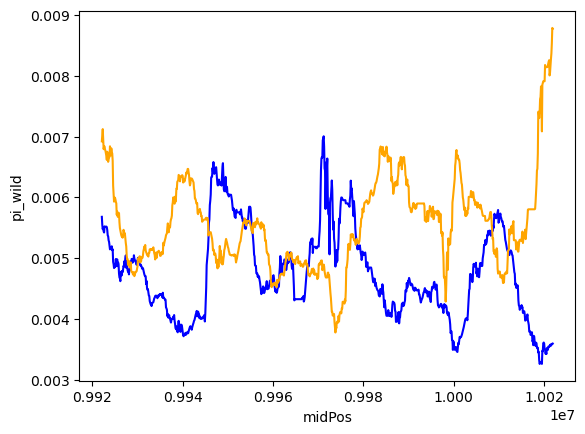

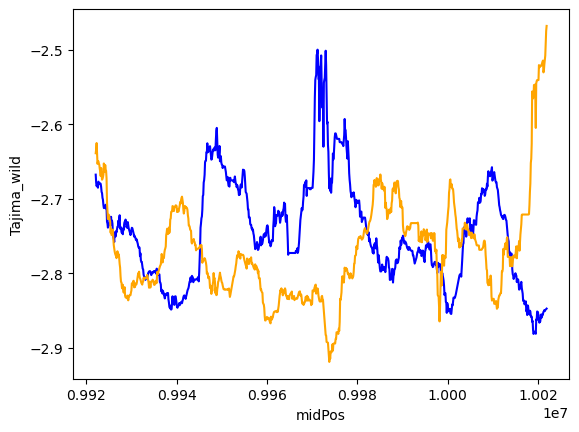

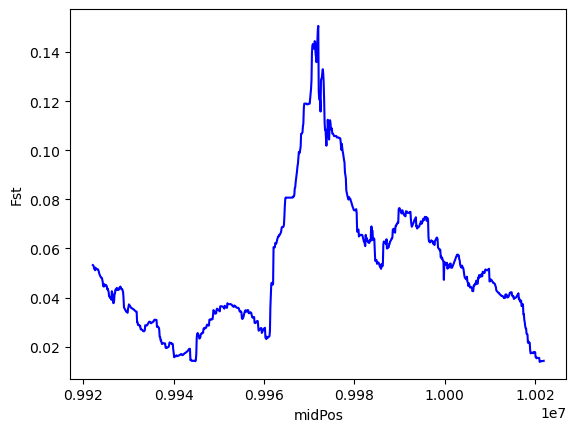

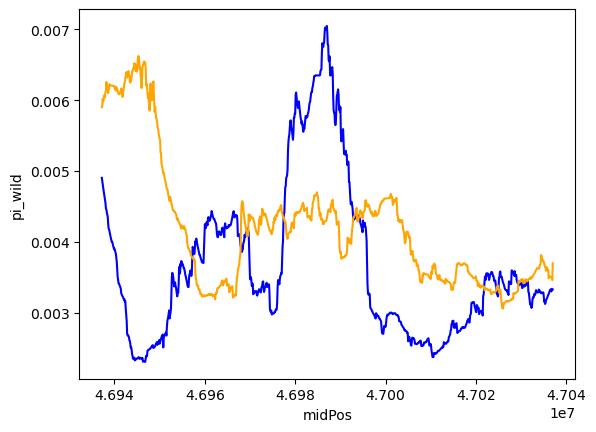

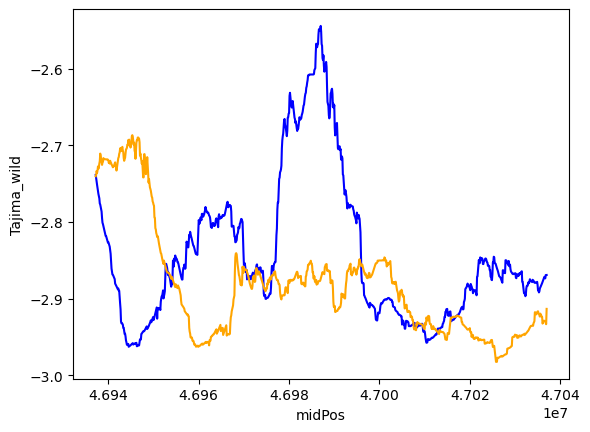

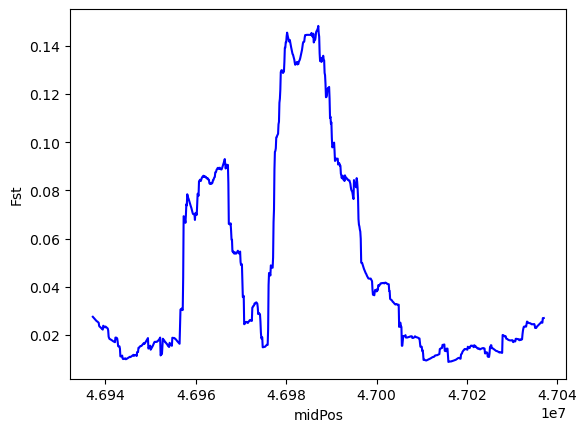

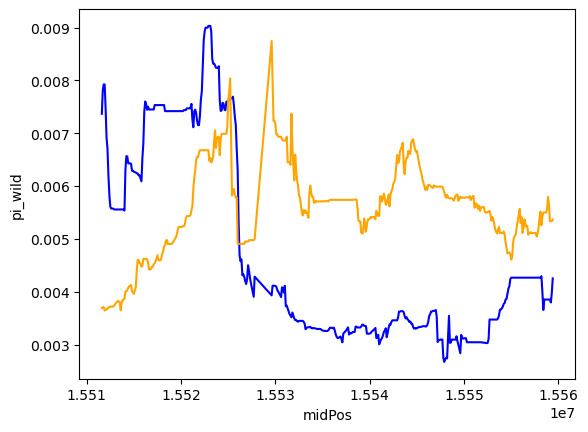

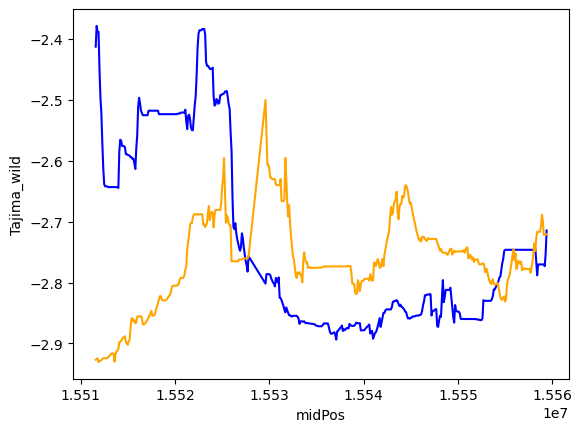

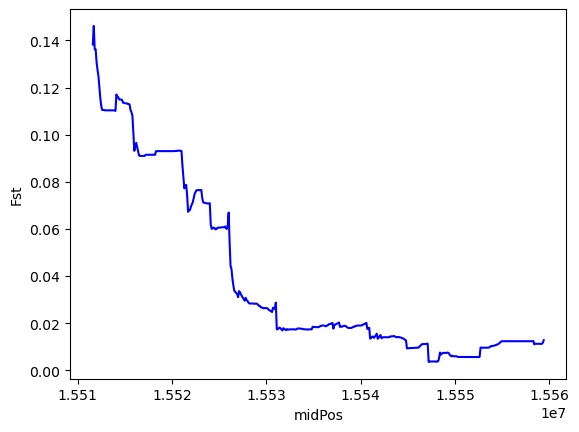

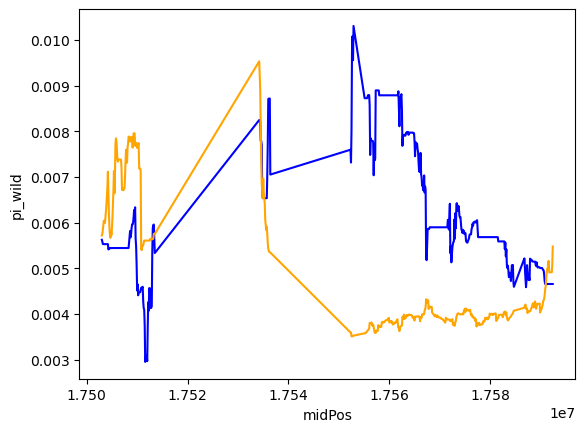

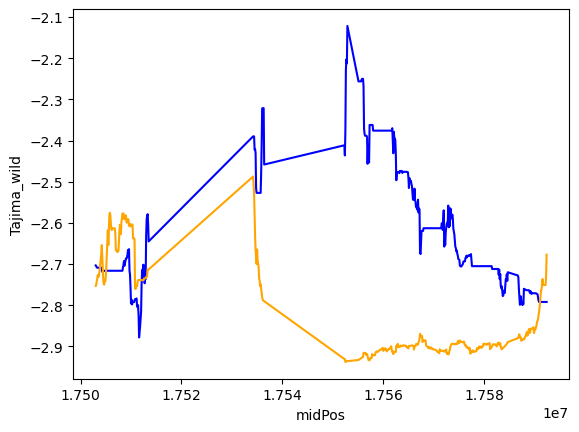

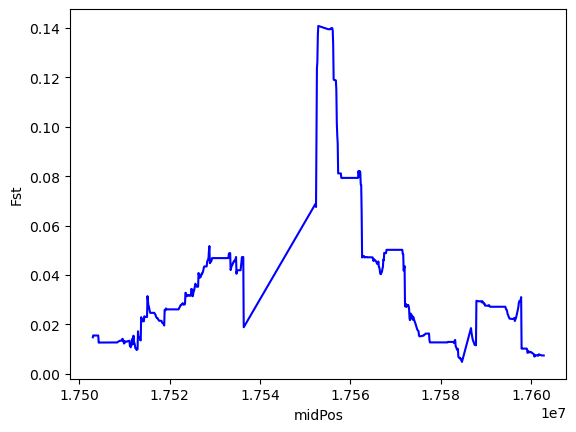

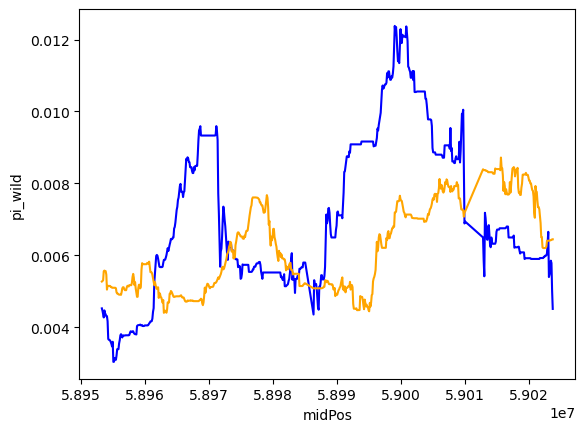

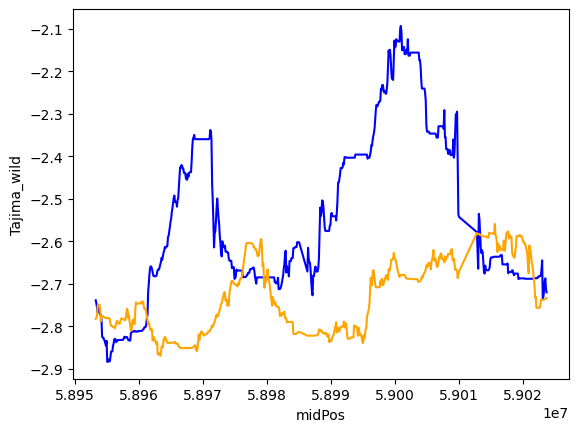

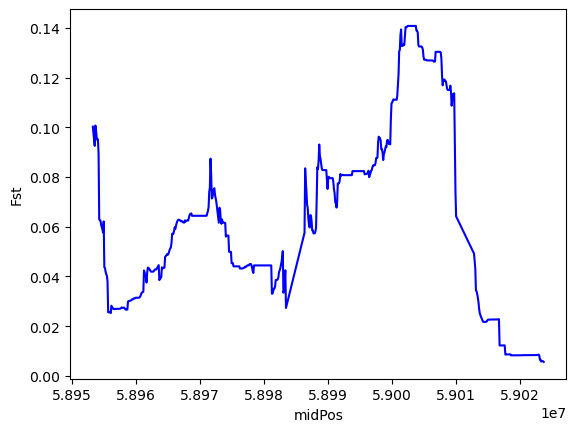

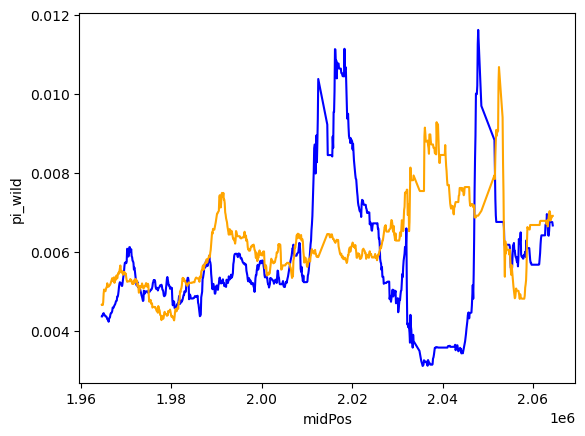

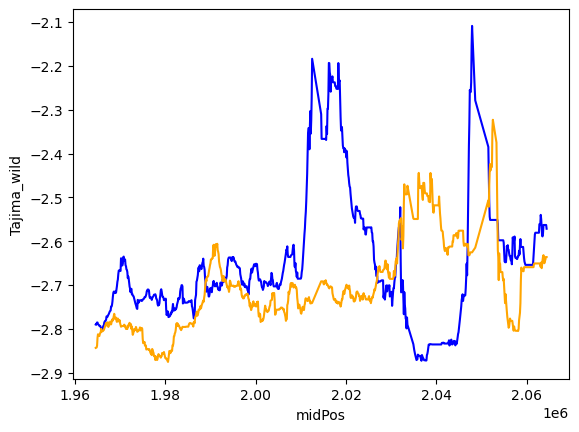

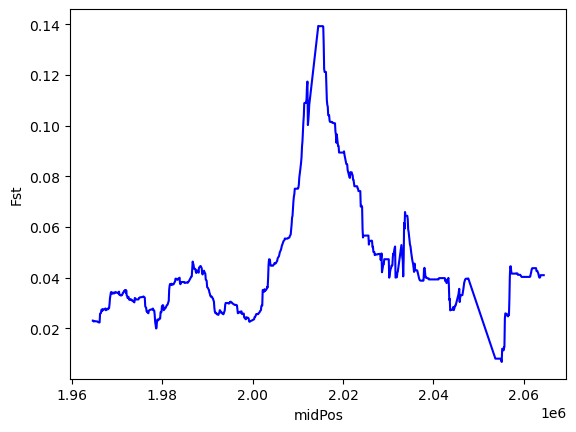

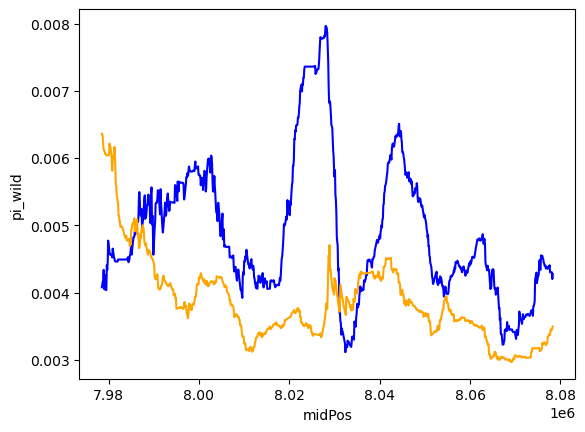

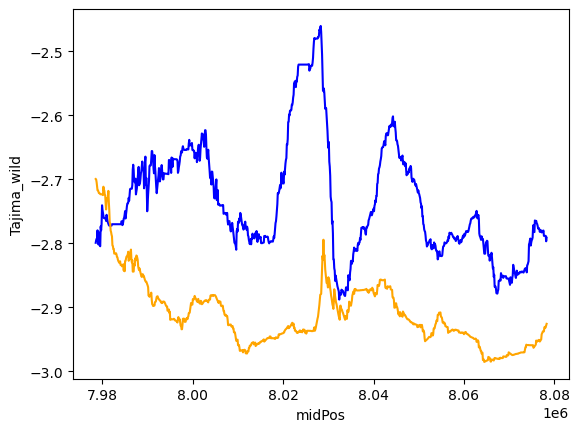

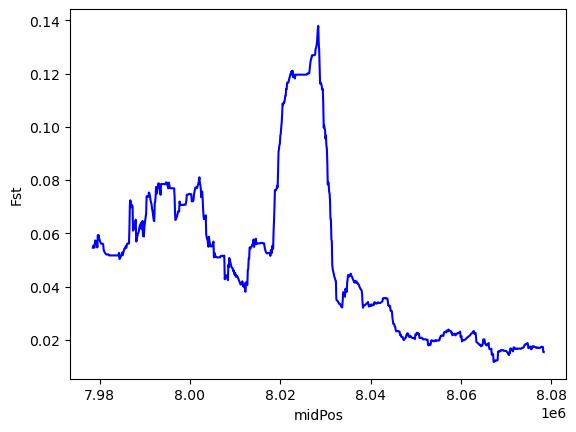

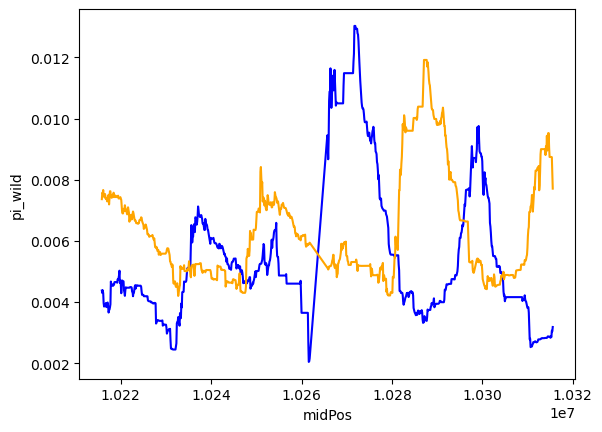

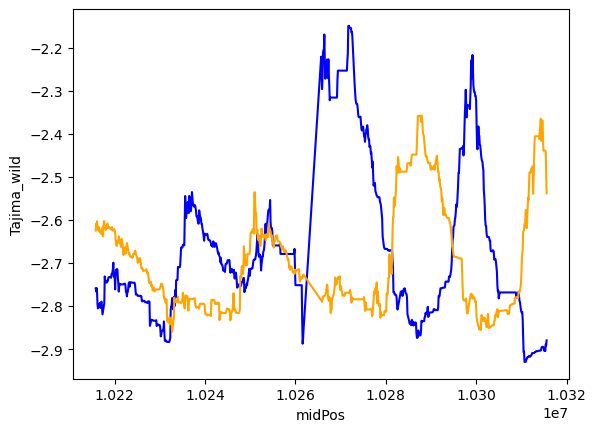

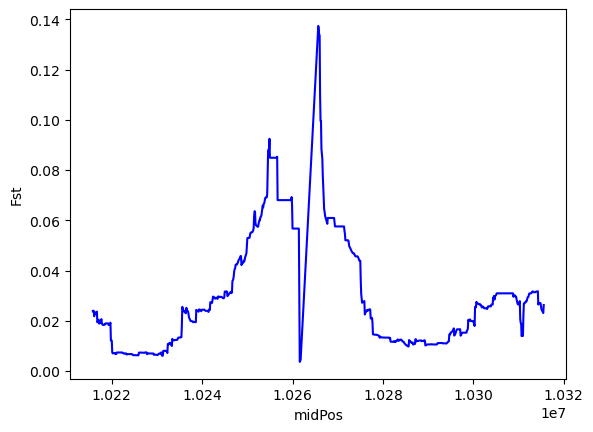

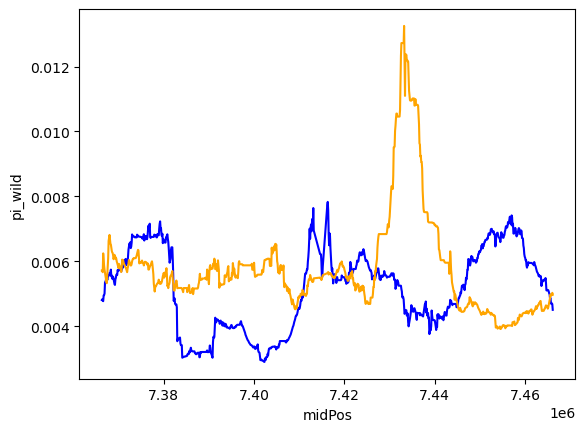

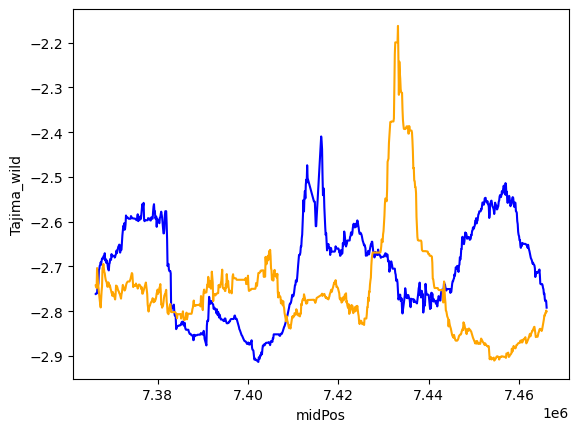

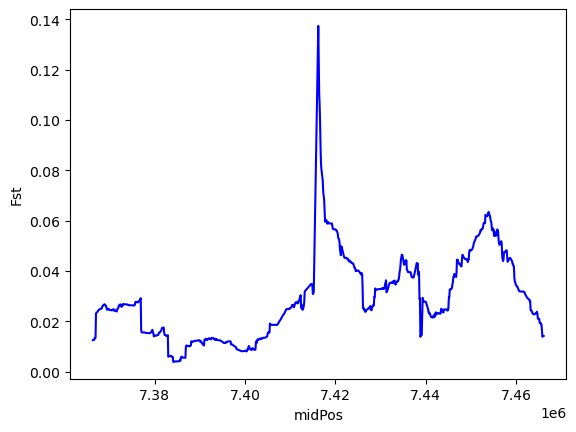

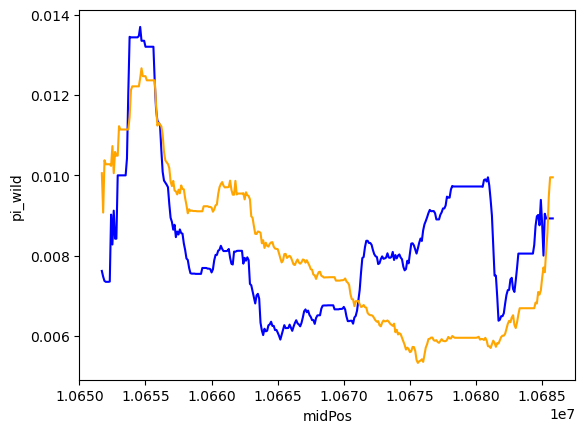

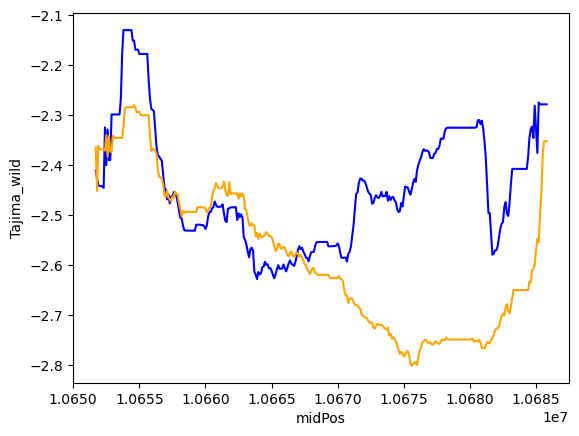

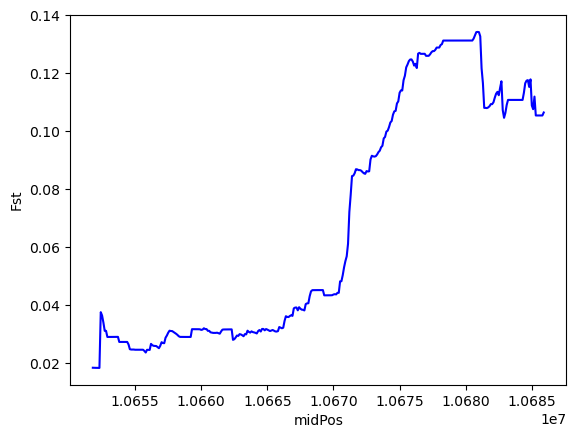

In [14]:
for i in range(len(indices)):
    plt.figure()
    sns.lineplot(data = tajima[tajima["Chr"] == indices["Chr"][i]][tajima["midPos"] > (indices["midPos"][i] - 50000)][tajima["midPos"] < (indices["midPos"][i] + 50000)].reset_index(drop=True), 
                    x = "midPos", y = "pi_wild", color = "blue")
    sns.lineplot(data = tajima[tajima["Chr"] == indices["Chr"][i]][tajima["midPos"] > (indices["midPos"][i] - 50000)][tajima["midPos"] < (indices["midPos"][i] + 50000)].reset_index(drop=True), 
                    x = "midPos", y = "pi_hatchery", color = "orange")
    plt.figure()
    sns.lineplot(data = tajima[tajima["Chr"] == indices["Chr"][i]][tajima["midPos"] > (indices["midPos"][i] - 50000)][tajima["midPos"] < (indices["midPos"][i] + 50000)].reset_index(drop=True), 
                    x = "midPos", y = "Tajima_wild", color = "blue")
    sns.lineplot(data = tajima[tajima["Chr"] == indices["Chr"][i]][tajima["midPos"] > (indices["midPos"][i] - 50000)][tajima["midPos"] < (indices["midPos"][i] + 50000)].reset_index(drop=True), 
                    x = "midPos", y = "Tajima_hatchery", color = "orange")
    plt.figure()
    sns.lineplot(data = fst[fst["Chr"] == indices["Chr"][i]][fst["midPos"] > (indices["midPos"][i] - 50000)][fst["midPos"] < (indices["midPos"][i] + 50000)].reset_index(drop=True), 
                    x = "midPos", y = "Fst", color = "blue")

In [24]:
df

midPos  Chr       Fst significant    accession  index       ind
0              5100  NaN  0.021271          No  NC_074670.1      0         0
1              5200  NaN  0.014303    Positive  NC_074666.1      0         1
2              5200  NaN  0.014405          No  NC_074668.1      0         2
3              5200  NaN  0.022149          No  NC_074670.1      0         3
4              5200  NaN  0.012424          No  NC_074677.1      0         4
...             ...  ...       ...         ...          ...    ...       ...
20363126  101310600  NaN  0.022503          No  NC_074665.1      0  20363126
20363127  101310700  NaN  0.021981          No  NC_074665.1      0  20363127
20363128  101310800  NaN  0.021304          No  NC_074665.1      0  20363128
20363129  101310900  NaN  0.020686          No  NC_074665.1      0  20363129
20363130  101311000  NaN  0.020338          No  NC_074665.1      0  20363130

[20363131 rows x 7 columns]

In [25]:
df = fst[["midPos", "Chr", "Fst", "significant"]].reset_index(drop=True)

#chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
#chrmap["index"] = chrmap["index"] + 1
#chrmap.columns = ["Chromosome", "Accession"]
#chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["Chr"]

#df = df.replace(chrmap)
df["accession"] = tmp
df.Chr = df.Chr.astype('category')

In [29]:
df.Chr.set_categories(['ch-%i' % i for i in range(42)], ordered=True)

AttributeError: 'Series' object has no attribute 'set_categories'

In [26]:
df

midPos          Chr       Fst significant    accession
0            67500  NC_074665.1  0.010862          No  NC_074665.1
1            67600  NC_074665.1  0.009973          No  NC_074665.1
2            67700  NC_074665.1  0.009973          No  NC_074665.1
3            67800  NC_074665.1  0.009973          No  NC_074665.1
4            67900  NC_074665.1  0.009973          No  NC_074665.1
...            ...          ...       ...         ...          ...
20363126  25736600  NC_074706.1  0.027745          No  NC_074706.1
20363127  25736700  NC_074706.1  0.027745          No  NC_074706.1
20363128  25736800  NC_074706.1  0.027745          No  NC_074706.1
20363129  25736900  NC_074706.1  0.027745          No  NC_074706.1
20363130  25737000  NC_074706.1  0.027745          No  NC_074706.1

[20363131 rows x 5 columns]

/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/1238103990.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(chrmap)
/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/1238103990.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nonindex = df[df["index"] == 0].groupby(('Chr'))
/fs/dss/scratch/6983534_noge4093_mpcs045/ipykernel_1280349/1238103990.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_index_positive = df[df["index"] == 1][df["significant"] == "Positive"].groupby(('Chr'))
/fs/dss/s

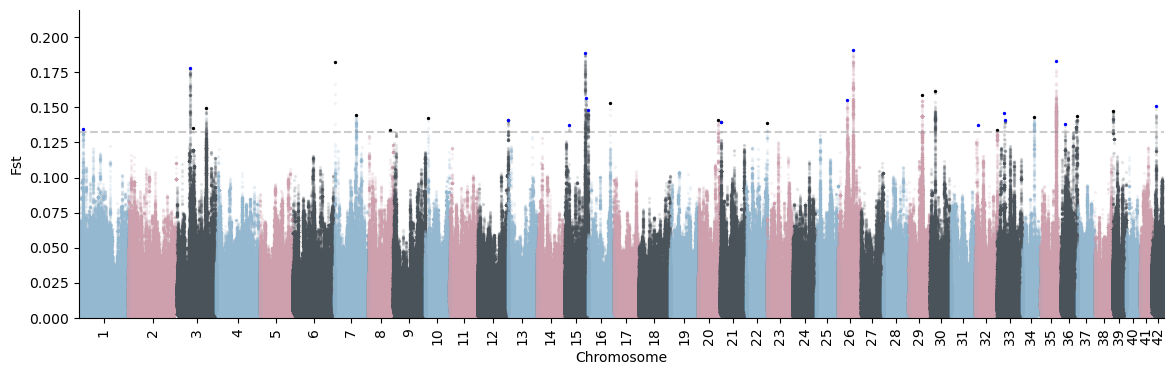

In [31]:
df = fst[["midPos", "Chr", "Fst", "significant"]].reset_index(drop=True)

chrmap = pd.DataFrame(data = df.Chr.unique().tolist()).reset_index(drop=False)
chrmap["index"] = chrmap["index"] + 1
chrmap.columns = ["Chromosome", "Accession"]
chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["Chr"]

df = df.replace(chrmap)
df["accession"] = tmp
df.Chr = df.Chr.astype('category')
df = df.sort_values(['Chr', "midPos"], ascending = True)

df.loc[df["Fst"] < 0, "Fst"] = 0
df = df[df["Fst"].notna()].reset_index(drop=True)
threshold = np.percentile(df.Fst, 99.99)
upper_1_percent = df.Fst[df.Fst >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["Fst"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('Chr'))
df_index_positive = df[df["index"] == 1][df["significant"] == "Positive"].groupby(('Chr'))
df_index_negative = df[df["index"] == 1][df["significant"] == "Negative"].groupby(('Chr'))
df_index_neutral = df[df["index"] == 1][df["significant"] == "No"].groupby(('Chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 4)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='Fst',
               color=colors[num % len(colors)], ax=ax, alpha = 0.1, s = 2)
    if group.empty:
        continue
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index_positive):
    group.plot(kind='scatter', x='ind', y='Fst',
               color="Red", ax=ax, alpha = 1, s = 2) 

for num, (name, group) in enumerate(df_index_negative):
    group.plot(kind='scatter', x='ind', y='Fst',
               color="Blue", ax=ax, alpha = 1, s = 2) 
    
for num, (name, group) in enumerate(df_index_neutral):
    group.plot(kind='scatter', x='ind', y='Fst',
               color="Black", ax=ax, alpha = 1, s = 2) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("Fst", ascending=False).reset_index(drop=True)["Fst"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('Fst')
ax.spines[['right', 'top']].set_visible(False)
plt.xticks(rotation = 90)
# show the graph
plt.savefig("../fst_scan.png", dpi = 300, transparent=True, bbox_inches='tight')

/tmp/ipykernel_337202/827933584.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fst[fst["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fst[fst["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sn

/tmp/ipykernel_337202/827933584.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fst[fst["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (fst[fst["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
/tmp/ipykernel_337202/827933584.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sn

/tmp/ipykernel_337202/827933584.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]


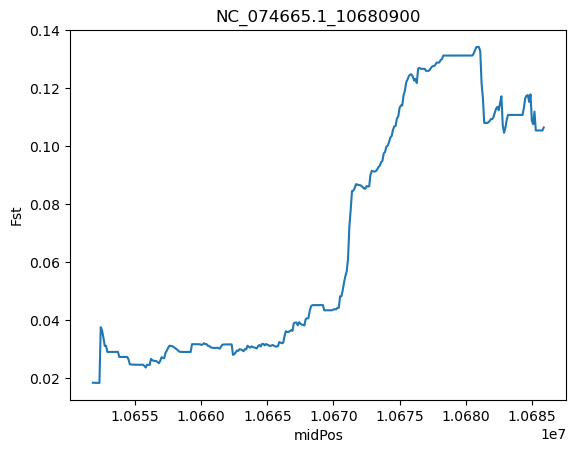

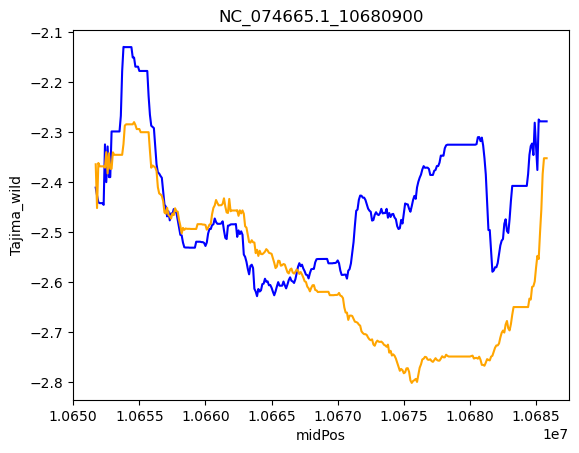

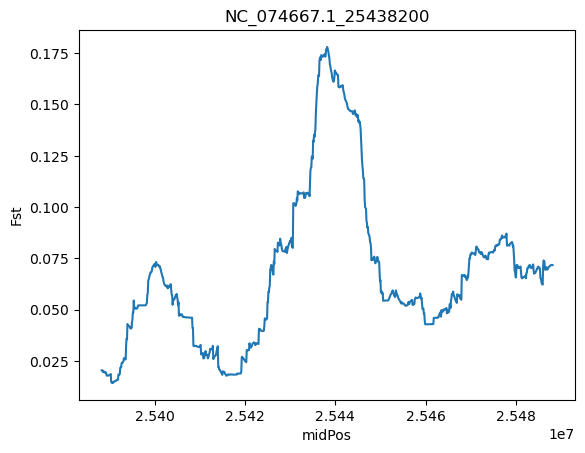

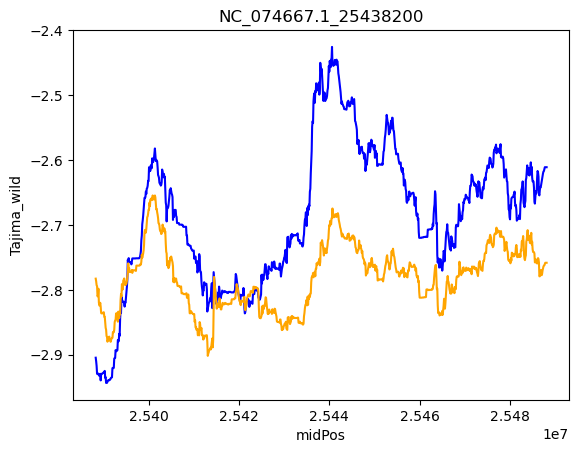

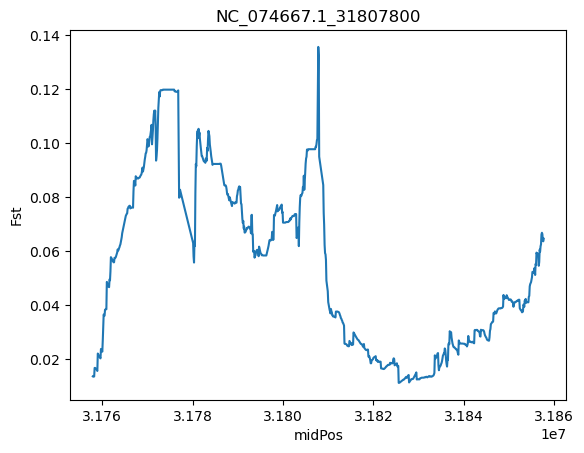

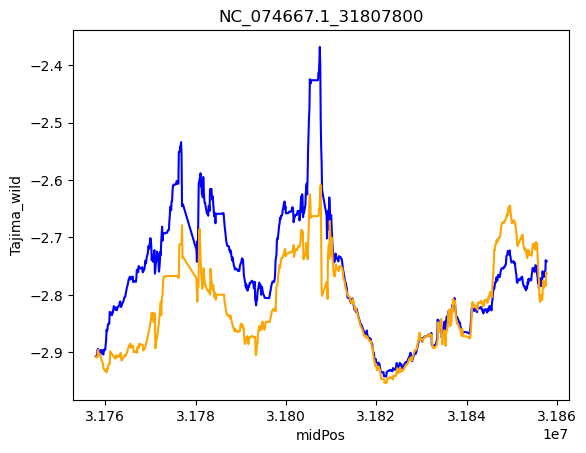

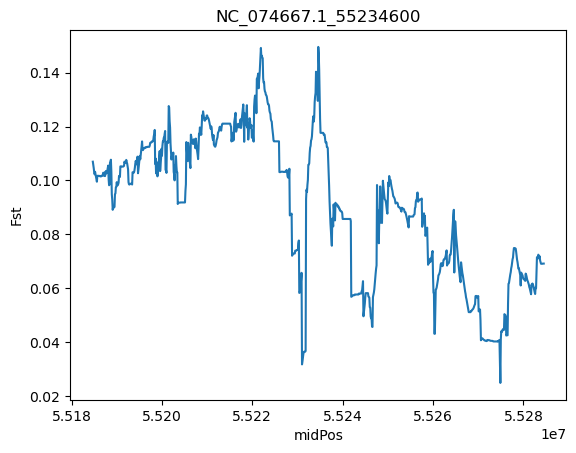

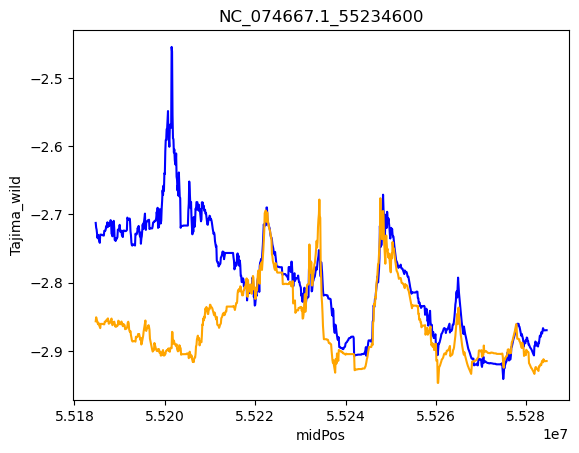

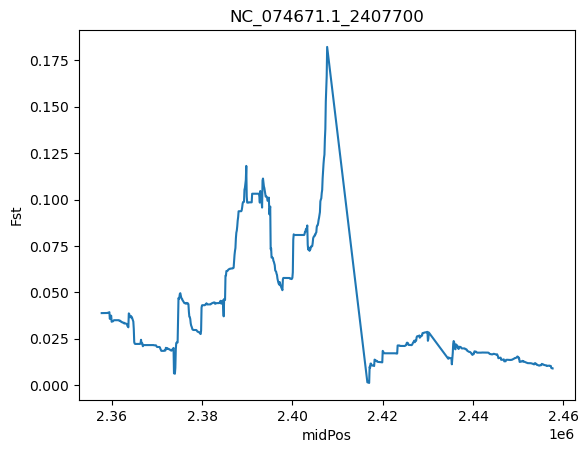

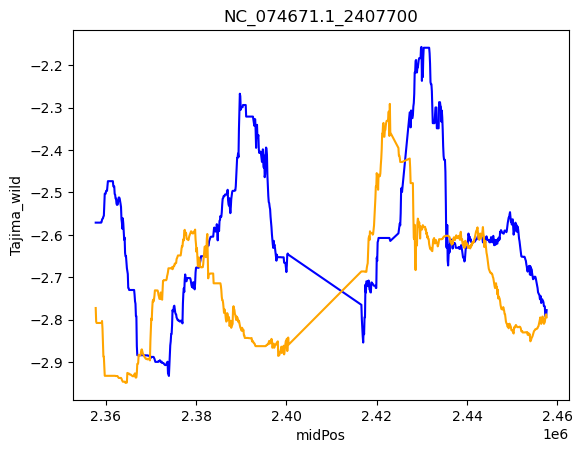

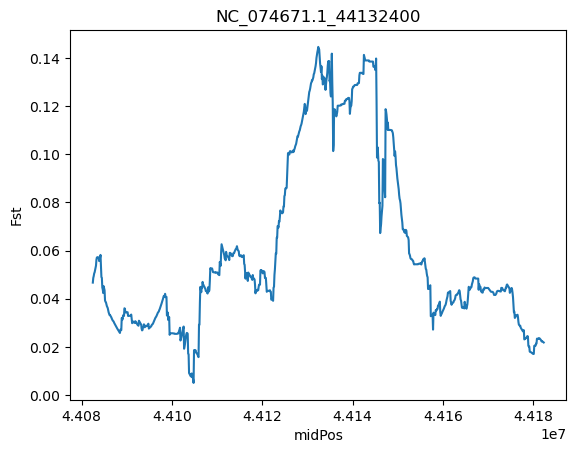

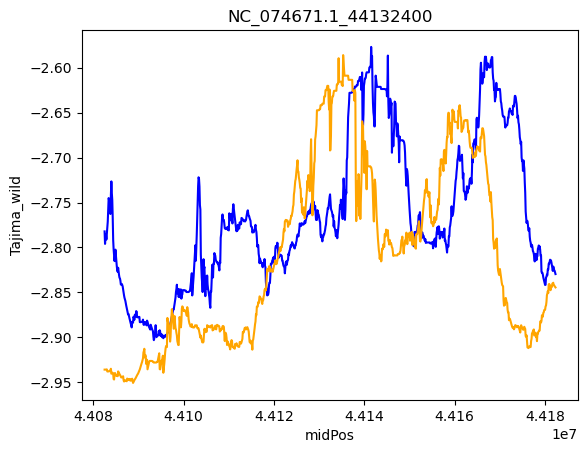

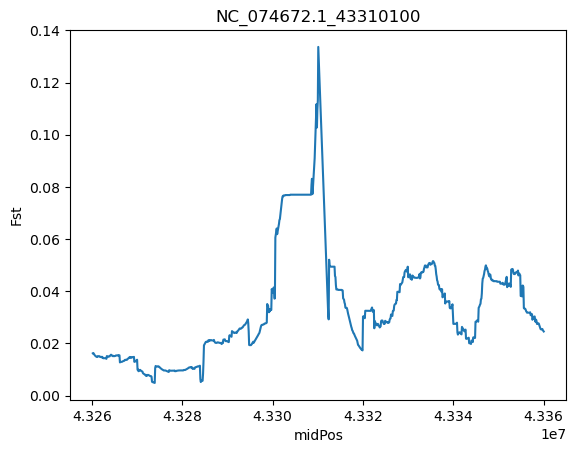

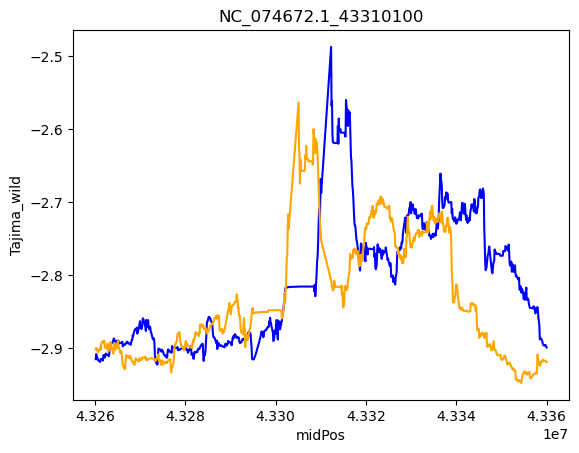

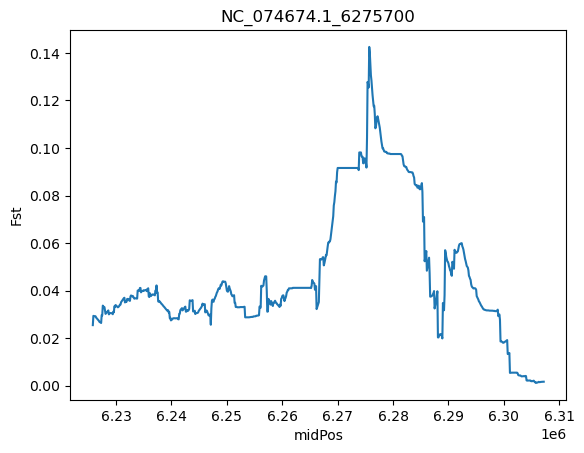

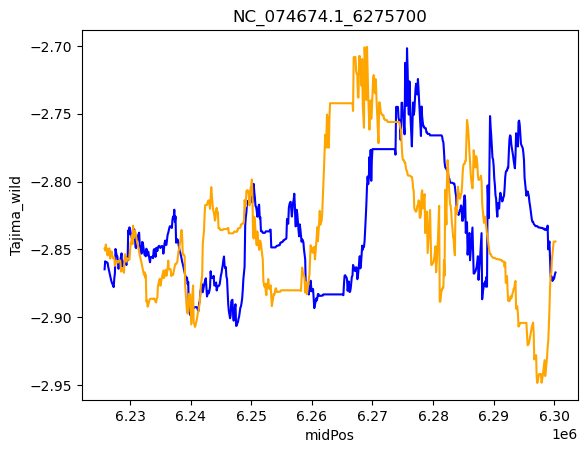

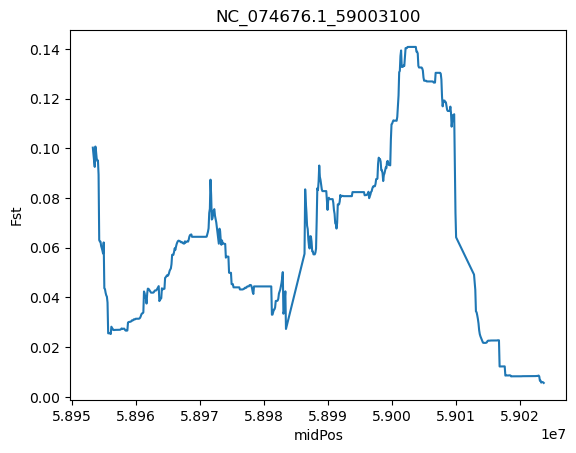

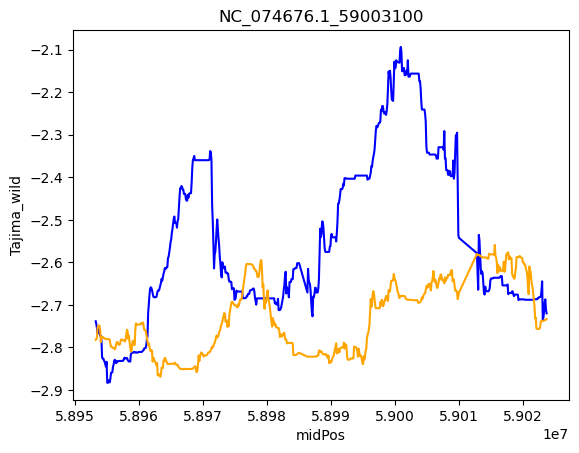

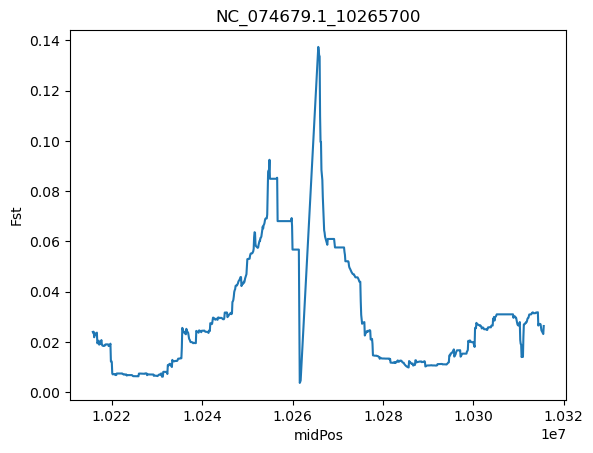

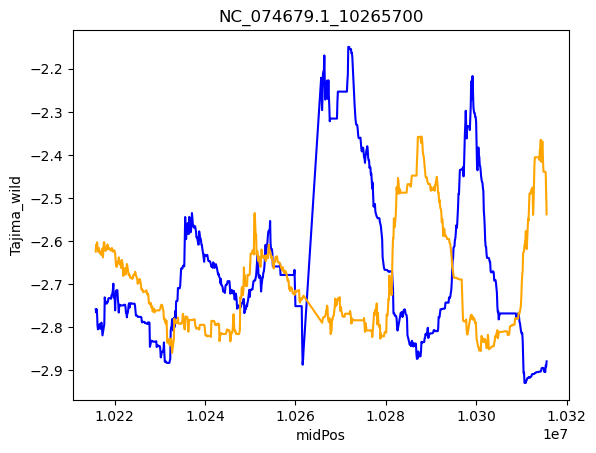

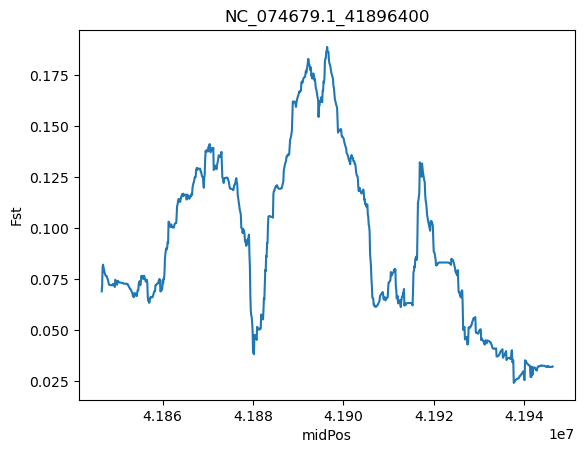

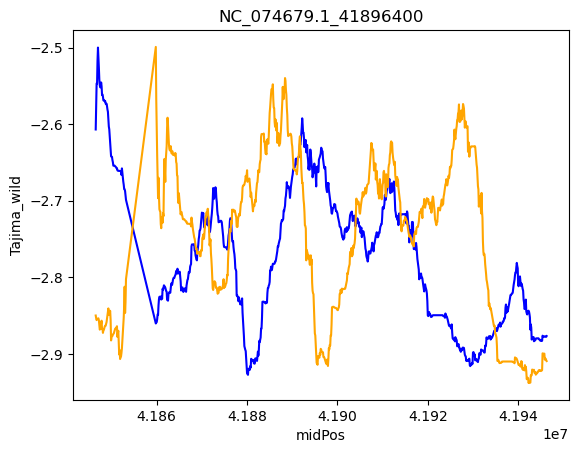

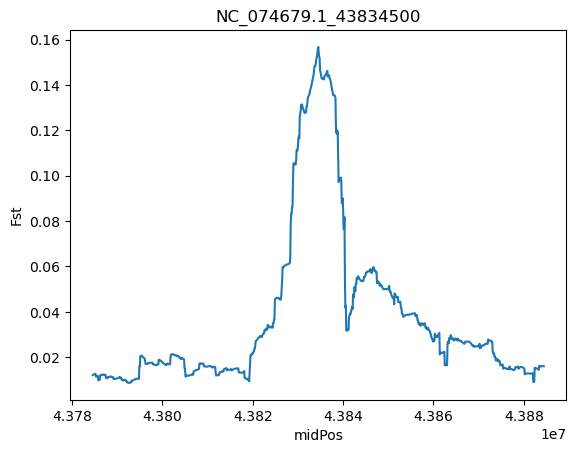

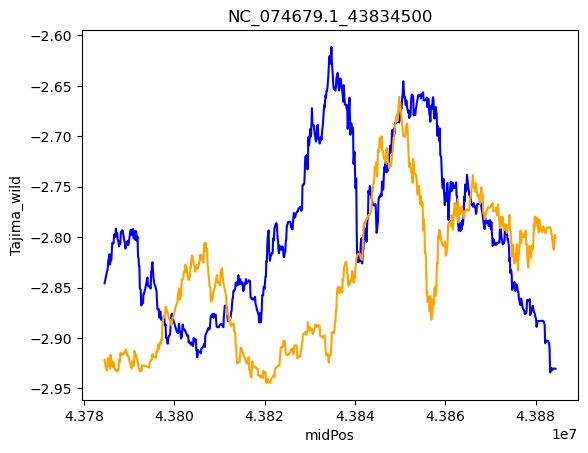

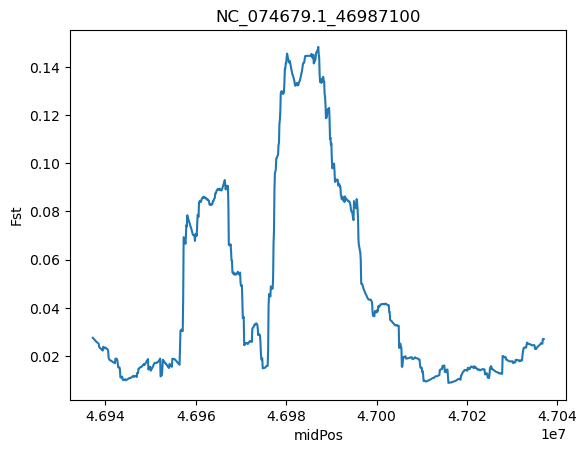

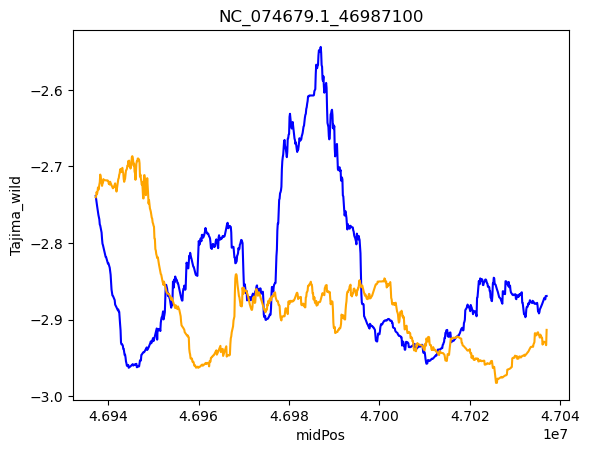

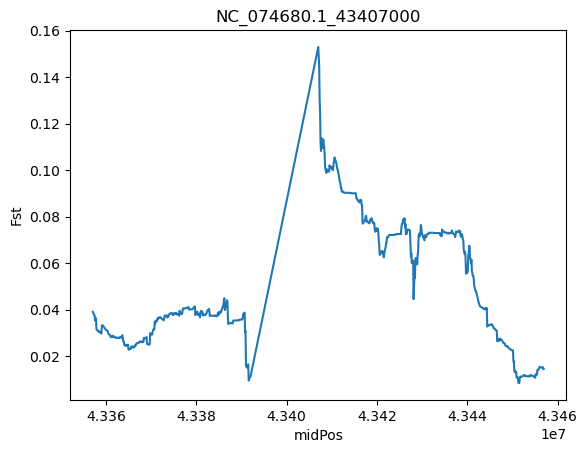

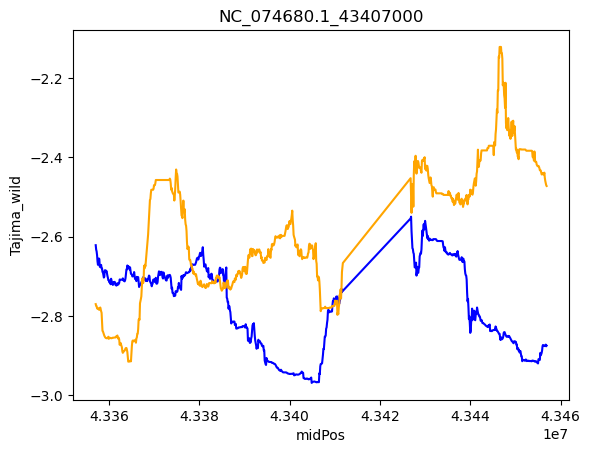

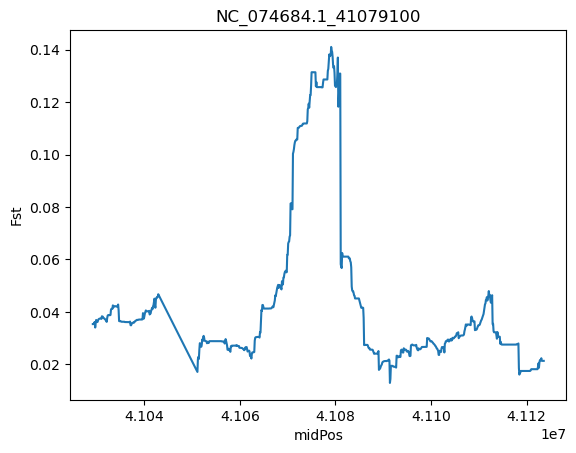

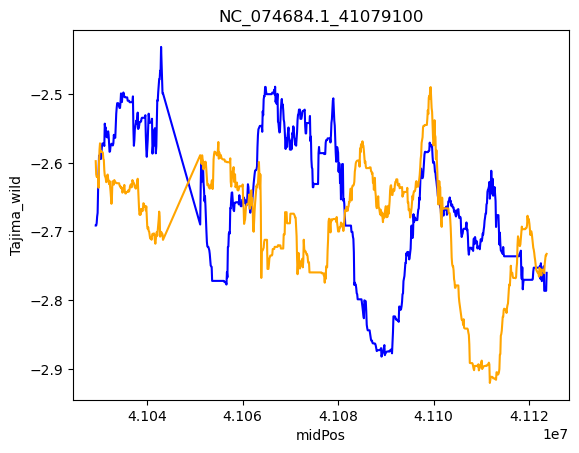

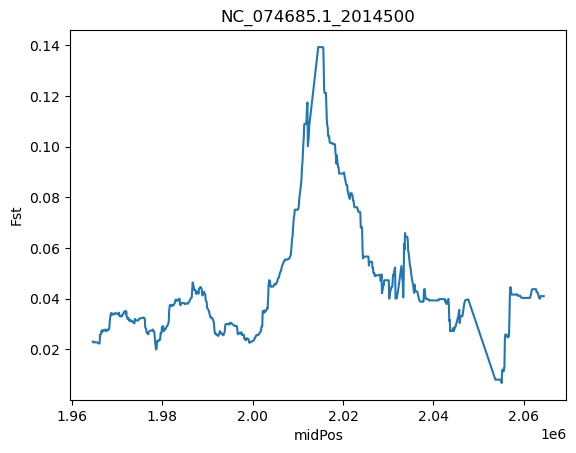

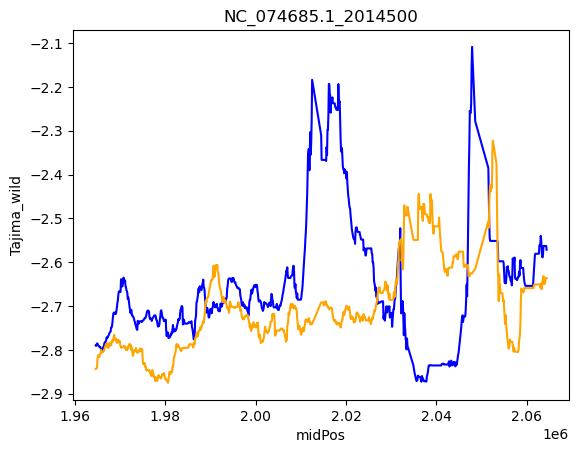

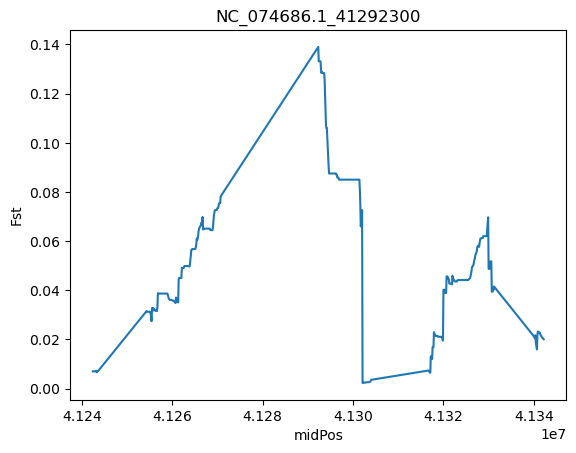

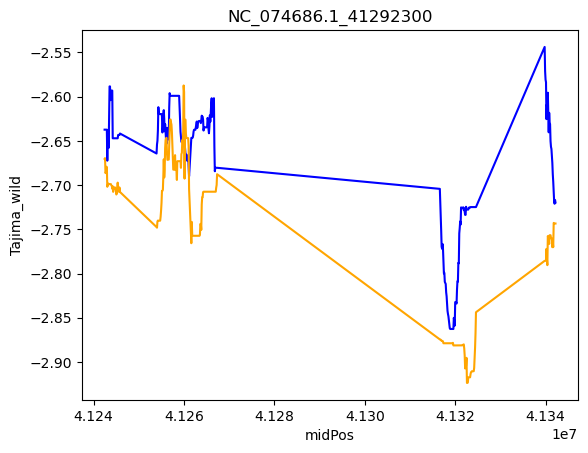

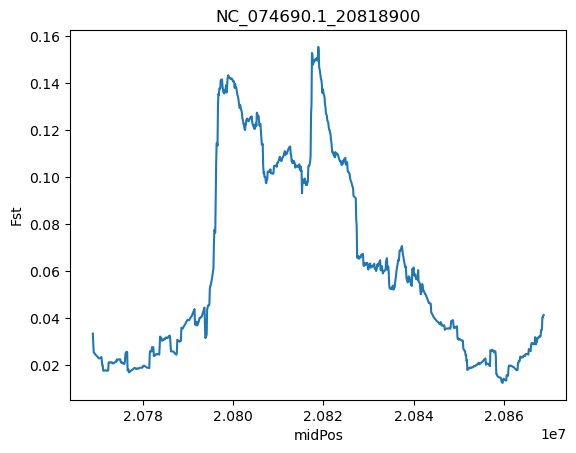

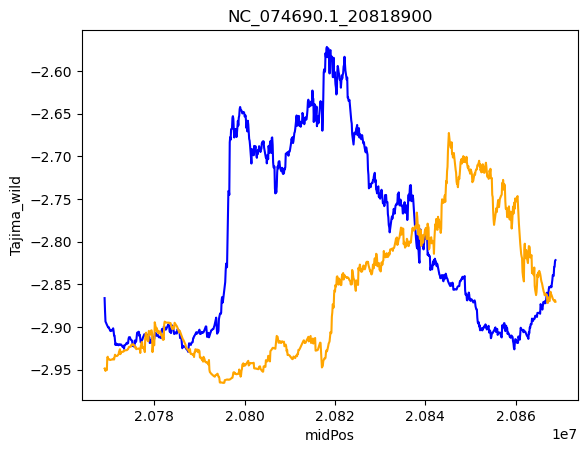

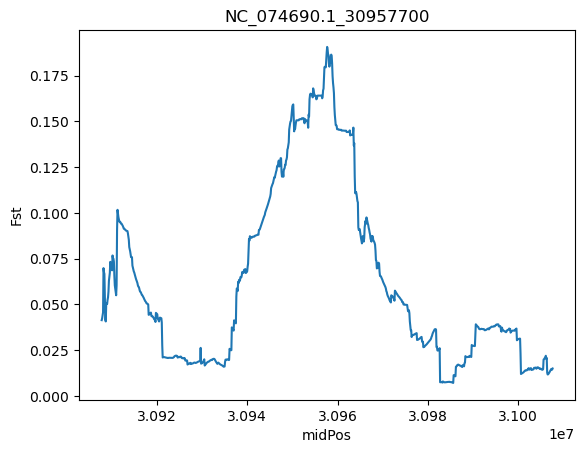

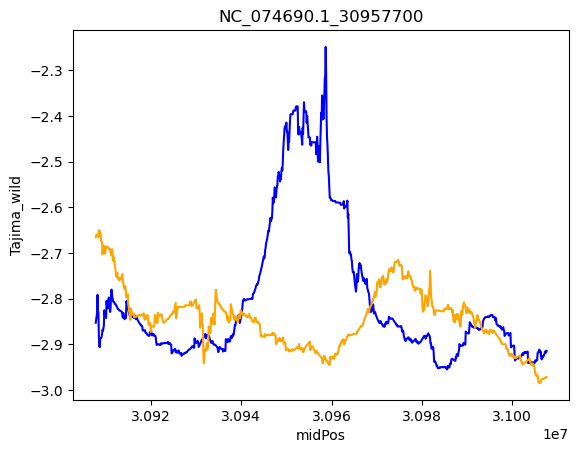

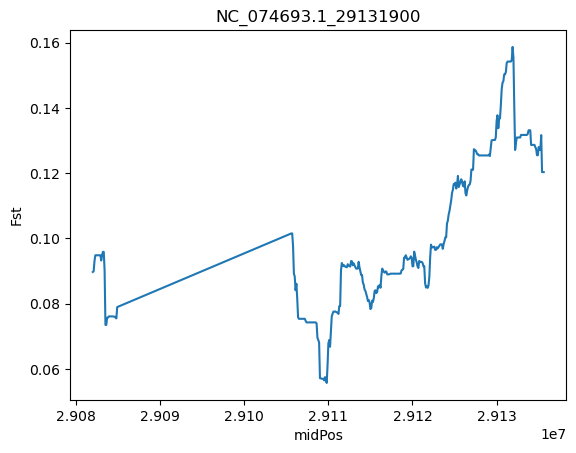

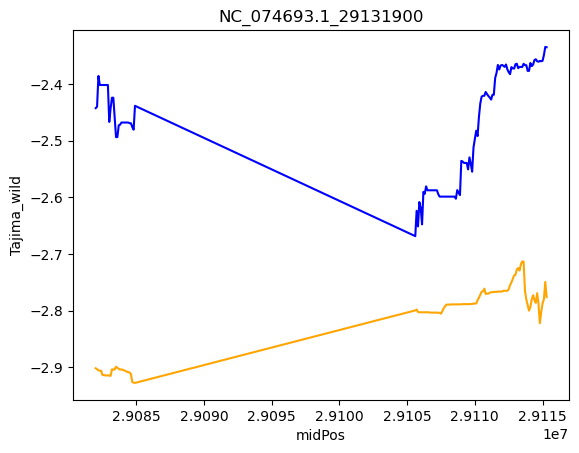

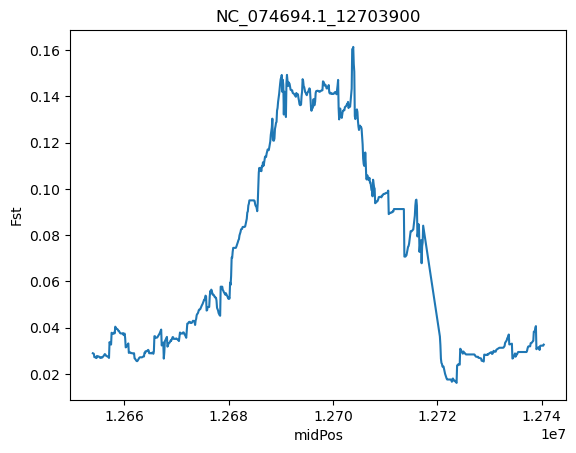

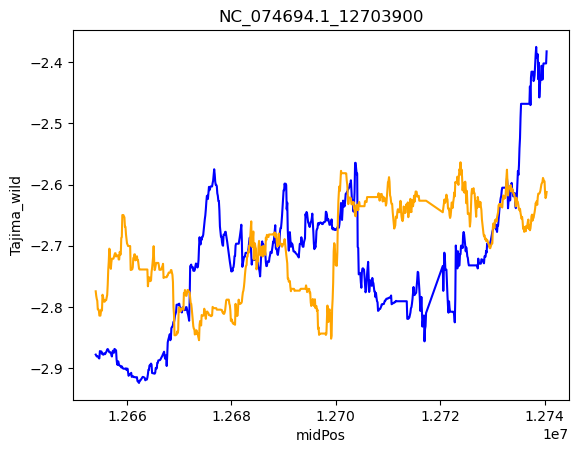

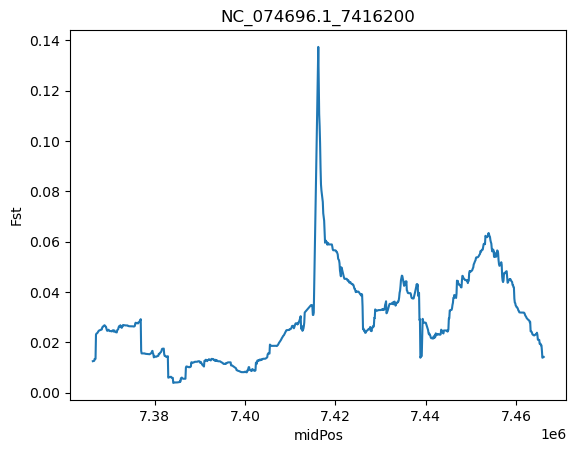

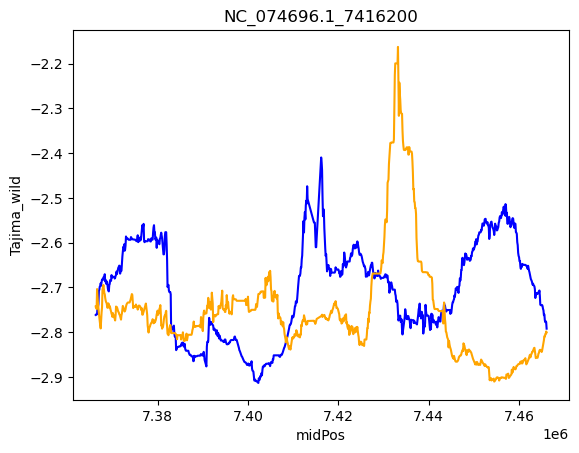

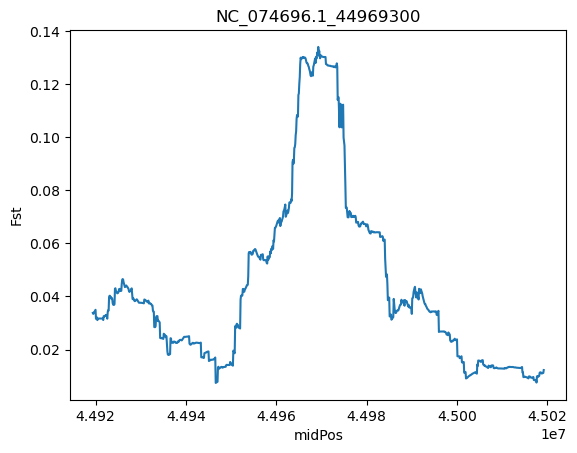

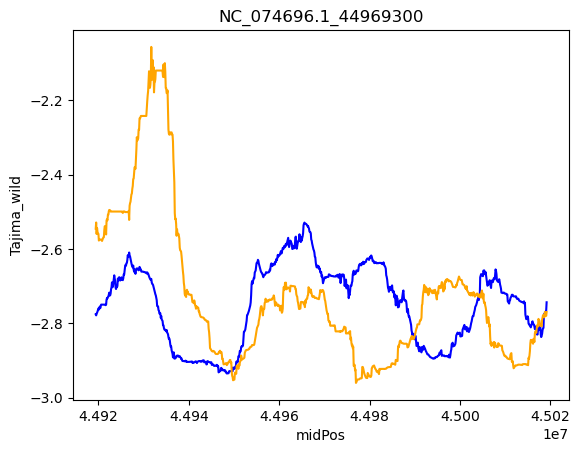

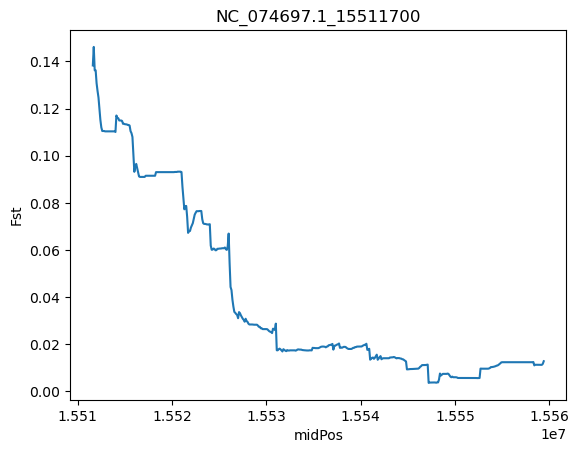

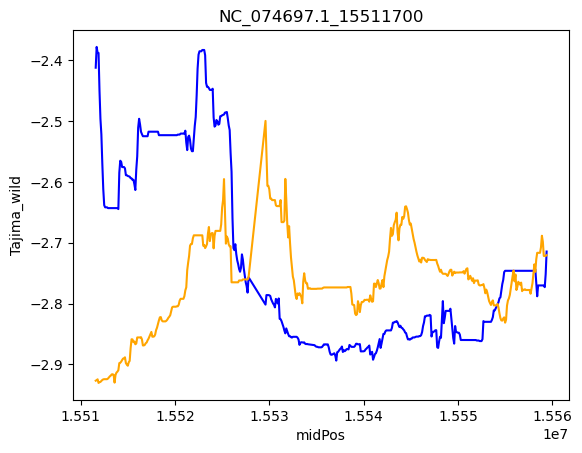

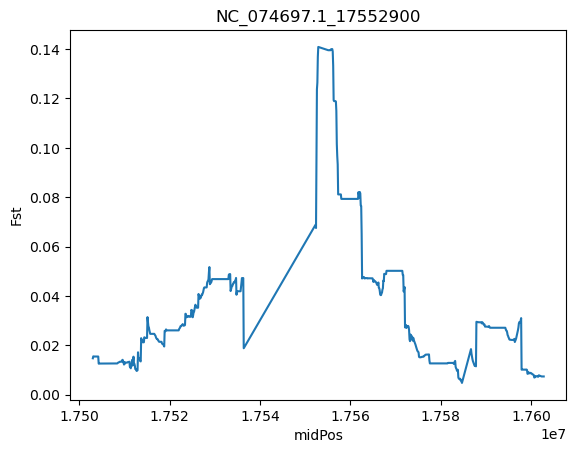

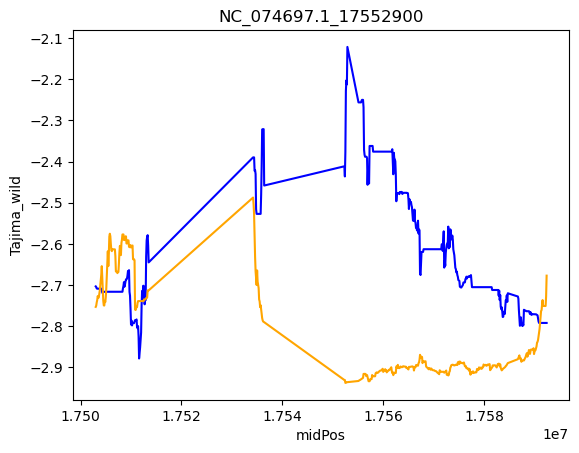

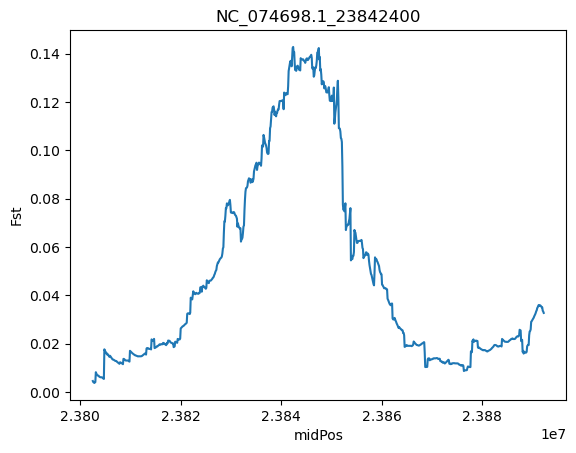

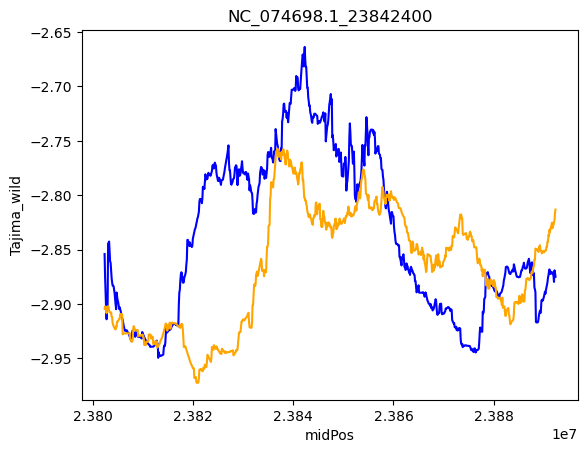

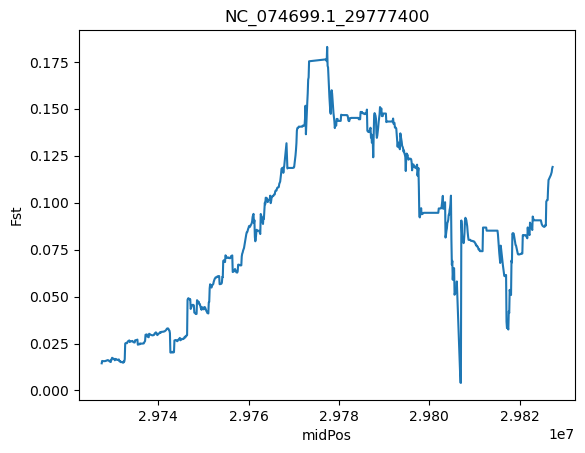

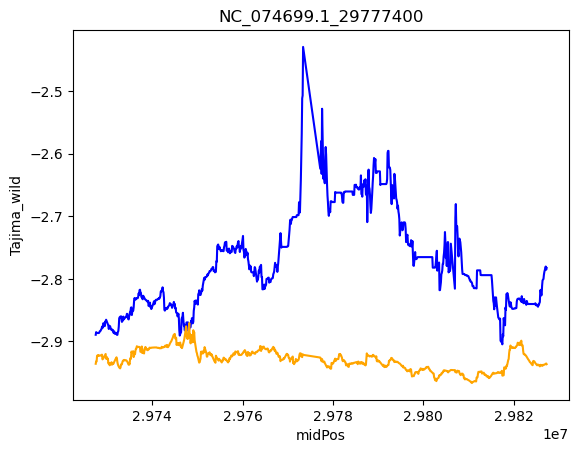

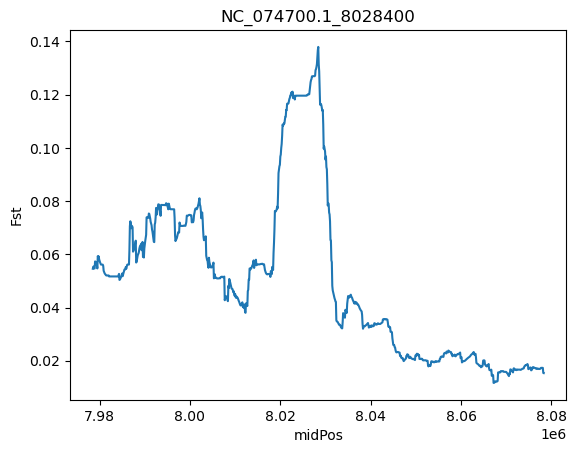

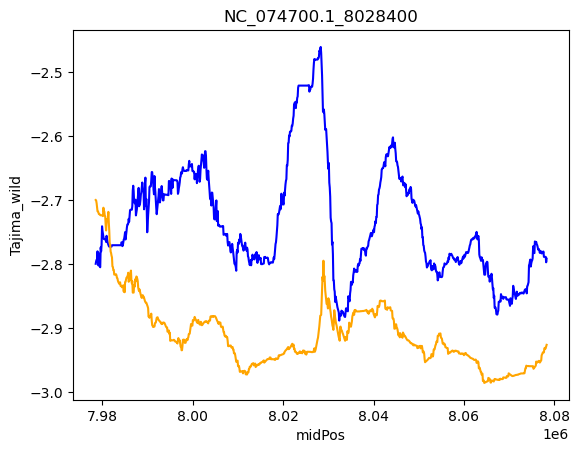

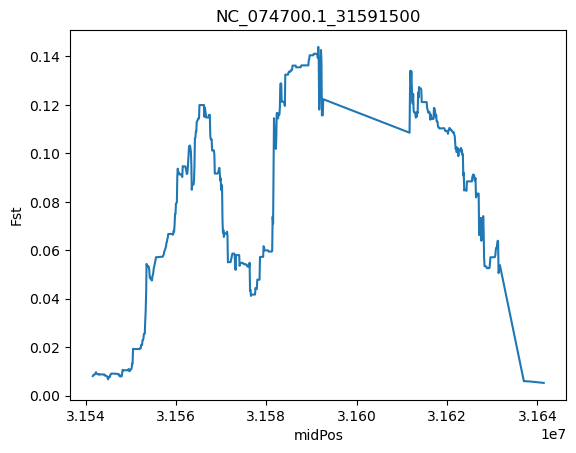

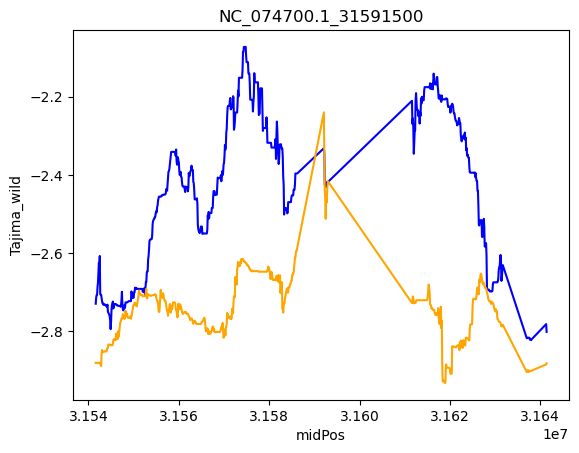

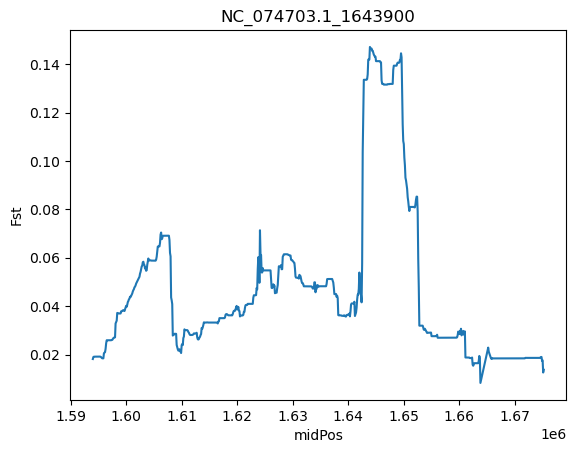

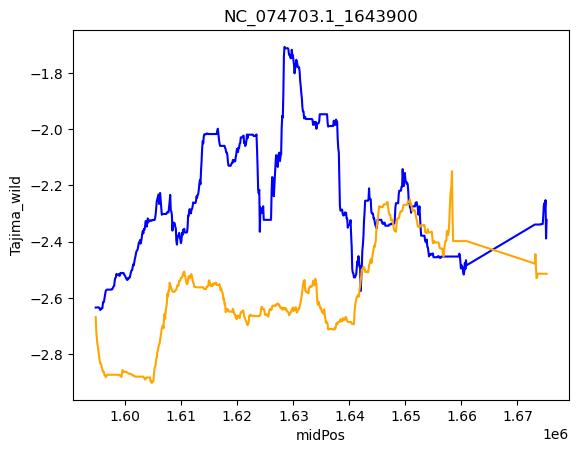

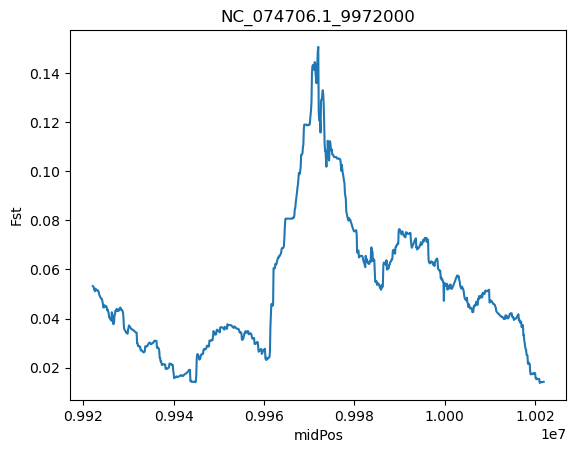

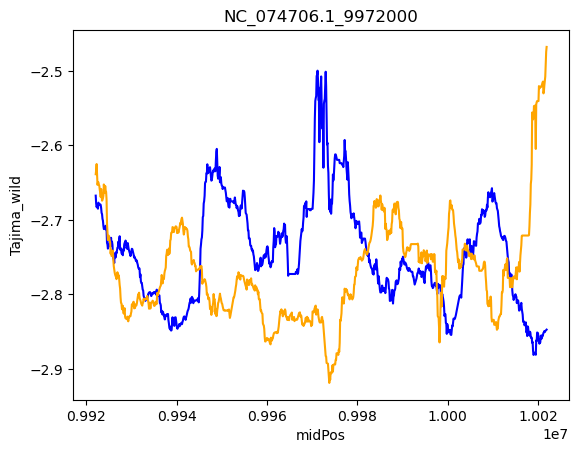

In [91]:
peaks = df[df["index"] == 1].reset_index(drop=True)
for i in range(len(peaks)):
    plt.figure()
    sns.lineplot(data = (fst[fst["Chr"] == peaks["Chr"][i]]
                         [fst["midPos"] > peaks["midPos"][i] - 50000]
                         [fst["midPos"] < peaks["midPos"][i] + 50000]), 
                x = "midPos", y = "Fst")
    plt.title(peaks["Chr"][i] + "_" + str(peaks["midPos"][i]))
    plt.figure()
    sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
                         [tajima["midPos"] > peaks["midPos"][i] - 50000]
                         [tajima["midPos"] < peaks["midPos"][i] + 50000]), 
                x = "midPos", y = "Tajima_wild", color = "blue")
    sns.lineplot(data = (tajima[tajima["Chr"] == peaks["Chr"][i]]
                         [tajima["midPos"] > peaks["midPos"][i] - 50000]
                         [tajima["midPos"] < peaks["midPos"][i] + 50000]), 
                x = "midPos", y = "Tajima_hatchery", color = "orange")
    plt.title(peaks["Chr"][i] + "_" + str(peaks["midPos"][i]))

positive = higher Tajima D in hatchery, lower Tajima D in wild


negative = higher Tajima D in wild, lower Tajima D in hatchery

In [92]:
tajima["Tajima_wild"].mean()

-2.807082249679815

In [93]:
tajima["Tajima_hatchery"].mean()

-2.8340815608652807

In [95]:
tajima["Tajima_wild"].median()

-2.845849

In [96]:
tajima["Tajima_hatchery"].median()

-2.865329

In [94]:
tajima["delta"].mean()

-0.026999311185466862